# **Genotype_Phenotype_MultiTask Learning Project**

## **Importing important Libraries**

In [1]:
%matplotlib inline
%load_ext tensorboard
#!pip install keras-tuner
import pandas as pd
import numpy as np
import tensorflow as tf
for gpu in tf.config.list_physical_devices("GPU"):
    tf.config.experimental.set_memory_growth(gpu, True)
from matplotlib import pyplot as plt
import keras_tuner as kt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

2023-04-27 15:47:48.434725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 15:47:48.532601: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-27 15:47:49.068956: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/rkannan/miniconda3/envs/richard_tf/lib/
2023-04-27 15:47:49.069007: W tensorflow

## **Loading Datasets into Colab from google drive**

In [3]:
genotypeFile = 'genotype.csv'
genotype = pd.read_csv(genotypeFile, sep = '\t', index_col = 0)
print('genotypeFile shape:', genotype.shape )

phenotypeFile = 'phenotype.csv'
multi_pheno = pd.read_csv(phenotypeFile, sep = ',', index_col = 0)
print('Phenotype_Multi shape:', multi_pheno.shape )

genotypeFile shape: (4390, 28220)
Phenotype_Multi shape: (4390, 20)


In [4]:
geno_df = pd.DataFrame(genotype)
print("The Columns of the Phenotype Dataset:\n",geno_df.columns,'\n')
print('\nChecking if Any Column has missing Values in the Genotype Dataset:\n{0}\n\n'.format(geno_df.isnull().sum()))
print("The first 10 records of the Genotype Dataset:\n")
geno_df.head(10)

The Columns of the Phenotype Dataset:
 Index(['33070_chrI_33070_A_T', '33147_chrI_33147_G_T', '33152_chrI_33152_T_C',
       '33200_chrI_33200_C_T', '33293_chrI_33293_A_T', '33328_chrI_33328_C_A',
       '33348_chrI_33348_G_C', '33403_chrI_33403_C_T', '33502_chrI_33502_A_G',
       '33548_chrI_33548_A_C',
       ...
       '12048853_chrXVI_925593_G_C', '12049199_chrXVI_925939_T_C',
       '12049441_chrXVI_926181_C_T', '12050613_chrXVI_927353_T_G',
       '12051167_chrXVI_927907_A_C', '12051240_chrXVI_927980_A_G',
       '12051367_chrXVI_928107_C_T', '12052782_chrXVI_929522_C_T',
       '12052988_chrXVI_929728_A_G', '12053130_chrXVI_929870_C_T'],
      dtype='object', length=28220) 


Checking if Any Column has missing Values in the Genotype Dataset:
33070_chrI_33070_A_T          0
33147_chrI_33147_G_T          0
33152_chrI_33152_T_C          0
33200_chrI_33200_C_T          0
33293_chrI_33293_A_T          0
                             ..
12051240_chrXVI_927980_A_G    0
12051367_chrXVI_

,33070_chrI_33070_A_T,33147_chrI_33147_G_T,33152_chrI_33152_T_C,33200_chrI_33200_C_T,33293_chrI_33293_A_T,33328_chrI_33328_C_A,33348_chrI_33348_G_C,33403_chrI_33403_C_T,33502_chrI_33502_A_G,33548_chrI_33548_A_C,...,12048853_chrXVI_925593_G_C,12049199_chrXVI_925939_T_C,12049441_chrXVI_926181_C_T,12050613_chrXVI_927353_T_G,12051167_chrXVI_927907_A_C,12051240_chrXVI_927980_A_G,12051367_chrXVI_928107_C_T,12052782_chrXVI_929522_C_T,12052988_chrXVI_929728_A_G,12053130_chrXVI_929870_C_T
SAMID,,,,,,,,,,,,,,,,,,,,,
01_01,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
01_02,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
01_03,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
01_04,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
01_06,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
01_07,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
01_08,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
01_09,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
01_10,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2


**NB:** laboratory strain (BY) and an isolate from a vineyard (RM). The original data fields in the yeast genotype profiles were encoded as -1 for BY and 1 for RM. The loss function to be used in this proposed model requires non-negative data fields, we replaced all -1 values with 2 when preprocessing the genotype data.

**Hence: 1 = vineyard strain (RM) and 2 = laboratory strain (BY)**

In [5]:
pheno_df = pd.DataFrame(multi_pheno)
print("The Columns of the Phenotype Dataset:\n",pheno_df.columns,'\n')
pheno_df_3 = pheno_df[[
    '1_CobaltChloride_1', '1_CopperSulfate_1', '1_Diamide_1',
       '1_E6-Berbamine_1', '1_Ethanol_1', '1_Formamide_1',
       '1_Hydroxyurea_1', '1_IndolaceticAcid_1', '1_Lactate_1',
       '1_Lactose_1', '1_MagnesiumChloride_1', '1_ManganeseSulfate_1',
       '1_Menadione_1', '1_Neomycin_1', '1_Raffinose_1', '1_Trehalose_1',
       '1_Xylose_1', '1_YNB_1', '1_YPD_1', '1_Zeocin_1'
                      ]]
print('\nChecking if Any Column has missing Values in the Phenotype Dataset:\n{0}\n\n'.format(pheno_df_3.isnull().sum()))
print("The first 10 records of the Phenotype Dataset:\n")
pheno_df_3.head(10)

The Columns of the Phenotype Dataset:
 Index(['1_CobaltChloride_1', '1_CopperSulfate_1', '1_Diamide_1',
       '1_E6-Berbamine_1', '1_Ethanol_1', '1_Formamide_1', '1_Hydroxyurea_1',
       '1_IndolaceticAcid_1', '1_Lactate_1', '1_Lactose_1',
       '1_MagnesiumChloride_1', '1_ManganeseSulfate_1', '1_Menadione_1',
       '1_Neomycin_1', '1_Raffinose_1', '1_Trehalose_1', '1_Xylose_1',
       '1_YNB_1', '1_YPD_1', '1_Zeocin_1'],
      dtype='object') 


Checking if Any Column has missing Values in the Phenotype Dataset:
1_CobaltChloride_1       222
1_CopperSulfate_1        114
1_Diamide_1               81
1_E6-Berbamine_1          80
1_Ethanol_1              129
1_Formamide_1            122
1_Hydroxyurea_1           93
1_IndolaceticAcid_1      104
1_Lactate_1              628
1_Lactose_1              574
1_MagnesiumChloride_1    127
1_ManganeseSulfate_1      67
1_Menadione_1             92
1_Neomycin_1              86
1_Raffinose_1            227
1_Trehalose_1             79
1_Xylose_1   

,1_CobaltChloride_1,1_CopperSulfate_1,1_Diamide_1,1_E6-Berbamine_1,1_Ethanol_1,1_Formamide_1,1_Hydroxyurea_1,1_IndolaceticAcid_1,1_Lactate_1,1_Lactose_1,1_MagnesiumChloride_1,1_ManganeseSulfate_1,1_Menadione_1,1_Neomycin_1,1_Raffinose_1,1_Trehalose_1,1_Xylose_1,1_YNB_1,1_YPD_1,1_Zeocin_1
01_01,-2.253831,-1.588146,0.194930,-1.055938,-0.250370,0.498227,-0.213244,-0.181865,NaN,-0.847586,-0.352481,1.212162,0.335224,-0.665269,-0.370470,-0.674826,-0.816972,17.711068,25.871208,0.763908
01_02,-1.887746,0.542872,0.451540,0.011593,0.103719,0.828660,0.639112,0.660820,NaN,-0.620460,0.394129,-1.942857,1.397952,-0.313936,1.007102,0.493351,-1.412415,18.286691,26.218803,1.272112
01_03,1.047185,0.453067,0.721835,1.645301,0.427616,-0.326177,-0.141772,-0.611875,-0.797737,-0.219193,-0.108411,0.750178,-0.913395,0.419907,-0.072188,-0.346773,0.169568,15.499536,24.496840,0.072323
01_04,2.417437,0.747427,0.454517,1.856809,-0.135731,0.556514,0.197233,0.371108,NaN,0.666068,0.021487,-0.917218,-0.239386,0.744319,0.033719,1.774186,0.668400,17.301076,25.827809,0.676447
01_06,-1.041743,0.180384,0.464474,-0.966225,-0.338030,-0.728221,0.543498,-1.833931,-0.170299,0.086030,0.108120,-1.251630,-0.038772,-0.670791,-0.233617,-0.199903,-0.283471,15.308695,25.513351,0.996027
01_07,1.734380,0.440941,0.380474,-0.049762,0.262329,-1.005624,0.527123,-0.656915,-0.398994,-0.670894,-0.003434,-1.141673,-0.920930,0.834907,-0.827282,-0.433795,0.938031,15.437198,24.154409,-0.812026
01_08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.621357,NaN,NaN
01_09,0.940961,0.797739,0.224067,0.542497,0.623649,0.460779,0.245576,-0.194188,-0.040061,0.217974,0.058288,0.125721,-0.795422,0.783061,1.515246,0.215446,0.155263,19.441247,28.519919,0.263971
01_10,0.106811,0.249607,0.384673,-1.374385,0.171040,-0.223995,-0.145539,0.136811,0.959766,0.262849,0.304710,-1.112984,0.121261,0.218337,0.088029,0.727231,0.134565,16.961701,26.664183,-0.034760
01_11,-1.349368,-0.124124,0.593057,1.097218,-0.362058,0.770479,0.745277,0.560757,0.736570,-0.017763,0.426360,0.559189,-0.764494,-0.121310,0.468228,-0.184995,-0.009737,16.543270,23.181630,1.259029


In [6]:
pheno_df_3.describe()

,1_CobaltChloride_1,1_CopperSulfate_1,1_Diamide_1,1_E6-Berbamine_1,1_Ethanol_1,1_Formamide_1,1_Hydroxyurea_1,1_IndolaceticAcid_1,1_Lactate_1,1_Lactose_1,1_MagnesiumChloride_1,1_ManganeseSulfate_1,1_Menadione_1,1_Neomycin_1,1_Raffinose_1,1_Trehalose_1,1_Xylose_1,1_YNB_1,1_YPD_1,1_Zeocin_1
count,4168.000000,4276.000000,4309.000000,4310.000000,4261.000000,4268.000000,4297.000000,4286.000000,3762.000000,3816.000000,4263.000000,4323.000000,4298.000000,4304.000000,4163.000000,4311.000000,4286.000000,4339.000000,4331.000000,4316.000000
mean,-0.002167,0.007495,-0.003565,0.010244,-0.001460,-0.016001,-0.015837,-0.018995,-0.000989,-0.007086,-0.008544,0.000123,0.004164,0.003531,-0.008845,-0.008982,-0.020917,16.387996,24.988156,-0.000662
std,0.928656,0.716367,0.839731,0.967866,0.472114,0.787717,0.364769,0.615602,0.776357,0.770810,0.438869,0.948098,0.803748,0.833738,0.663019,0.735866,0.738140,1.069024,2.273753,0.967717
min,-2.986634,-4.359688,-3.458580,-2.115366,-2.111576,-4.352861,-2.865521,-3.222564,-3.944102,-3.584842,-2.279338,-2.339743,-3.050449,-3.814010,-2.905491,-3.619955,-3.237204,11.811819,16.425624,-2.106594
25%,-0.570615,-0.257038,-0.531162,-0.664872,-0.299687,-0.410830,-0.221138,-0.264527,-0.465318,-0.490573,-0.280307,-0.684072,-0.523554,-0.349418,-0.424614,-0.441370,-0.493247,15.688399,23.477206,-0.810701
50%,-0.353169,0.137448,0.134708,-0.402642,0.014423,0.093355,-0.001265,0.093428,0.034626,0.018394,-0.001556,-0.257264,0.042384,0.204966,0.004687,0.017288,-0.018307,16.432730,24.876704,-0.198123
75%,0.366364,0.455080,0.577930,0.600145,0.306615,0.491365,0.209070,0.369638,0.513707,0.498850,0.283265,0.583188,0.566911,0.590661,0.420898,0.491016,0.462095,17.098054,26.356892,0.821270
max,4.128672,2.152255,2.353494,3.531346,2.061407,3.932560,2.195662,1.797898,3.118644,4.434836,2.168053,3.339181,3.244874,2.336118,2.819776,2.398808,3.546980,20.600210,34.536418,2.742622


### Summary of Data Loading

The genotype and phenotpye datasets have been loaded successfully. The **Genotype** are the features that would be used to predict the three **phenotypes** using **Multi-Task Learning**

- The genotype dataset has no missing values
- The phenotype dataset has missing values in each of the phenotype we desire to predict.

Hence, pre-processing needs to be done to clean the data

## **PART 1: DATA PRE-PROCESSING**

Removing NAN values from phenotype. It is important to note that because the phenotype is a reflection from the genotypes, all NAN phenotypes removed has to be removed from the corresponding genotype columns.

Steps:

1.   Concatenate the phenotpye and genotype dataframes together.
2.   Iterate through the dataframe in step1 removing every row whose **'1_CobaltChloride_1'** column has a NAN value.
3.   Separate the genotypes from the phenotype into two distinct datasets where the genotypes are the inputs (x) and phenotype would the output (y). However, we do one-hot encoding on the input(x)
4.   We normalize the output (thus, the phenotypes). 









In [7]:
# genotypeFile = 'genotype.csv'
# genotype = pd.read_csv(genotypeFile, sep = '\t', index_col = 0)
# print('genotypeFile shape:', genotype.shape )

# phenotypeFile = 'phenotype.csv'
# multi_pheno = pd.read_csv(phenotypeFile, sep = ',', index_col = 0)
# print('Phenotype_Multi shape:', multi_pheno.shape )


# take a small part to test code
# genotype
X = genotype
# X = genotype.iloc[0:1000:, 0:5000]
# single_pheno
Y = multi_pheno.iloc[:, :]#index=2 --> 1_E6-Berbamine_1
# Y = multi_pheno.iloc[0:1000, pheno_i]


# # Add noise
# random missing masker
missing_perc = 0.1
nonmissing_ones = np.random.binomial(
    1, 1 - missing_perc, size=X.shape[0] * X.shape[1])
nonmissing_ones = nonmissing_ones.reshape(X.shape[0], X.shape[1])
nonmissing_ones, nonmissing_ones.shape

corrupted_X = X * nonmissing_ones
# corrupted_X.head()

# # Prepare data
# ## One-hot encoding

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#X_onehot = to_categorical(X)
corrupted_X_onehot = corrupted_X
# corrupted_X_onehot.shape

# normlization
cols_to_norm = ['1_CobaltChloride_1', '1_CopperSulfate_1', '1_Diamide_1',
       '1_E6-Berbamine_1', '1_Ethanol_1', '1_Formamide_1', '1_Hydroxyurea_1',
       '1_IndolaceticAcid_1', '1_Lactate_1', '1_Lactose_1',
       '1_MagnesiumChloride_1', '1_ManganeseSulfate_1', '1_Menadione_1',
       '1_Neomycin_1', '1_Raffinose_1', '1_Trehalose_1', '1_Xylose_1',
       '1_YNB_1', '1_YPD_1', '1_Zeocin_1']
x_ = multi_pheno[cols_to_norm]
 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_)
df = pd.DataFrame(x_scaled,columns=cols_to_norm)
scaled_Y =df


def detect_outliers(df):
    outlier_indices = []

    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR

    outlier_indices = df[(df < Q1 - outlier_step) |
                         (df > Q3 + outlier_step)].index

    return outlier_indices


temp_Y = scaled_Y[~scaled_Y.isna()]
outliers_index = detect_outliers(temp_Y)


# set outliers as NAN
scaled_Y_ = scaled_Y.copy()
scaled_Y_[outliers_index] = np.nan


# ## Split train and test
train_X, test_X, corrupted_train_X, corrupted_test_X, train_Y, test_Y = train_test_split(
    X, corrupted_X_onehot, scaled_Y_.iloc[:], test_size=0.1, random_state = 42)

# split df to train and valid
train_X, valid_X, corrupted_train_X, corrupted_valid_X, train_Y, valid_Y = train_test_split(
    train_X, corrupted_train_X, train_Y, test_size=0.1,random_state = 42)


train_X = train_X.reset_index().drop('SAMID',axis=1)
train_Y = train_Y.iloc[:,0:20].reset_index().drop('index',axis=1)

valid_X = valid_X.reset_index().drop('SAMID',axis=1)
valid_Y = valid_Y.iloc[:,0:20].reset_index().drop('index',axis=1)

test_X = test_X.reset_index().drop('SAMID',axis=1)
test_Y = test_Y.iloc[:,0:20].reset_index().drop('index',axis=1)

x_train = to_categorical(pd.concat([train_X,train_Y],axis=1).dropna().iloc[:,0:-20])
y_train = train_Y.dropna().to_numpy()

x_valid = to_categorical(pd.concat([valid_X,valid_Y],axis=1).dropna().iloc[:,0:-20])
y_valid = valid_Y.dropna().to_numpy()

x_test = to_categorical(pd.concat([test_X,test_Y],axis=1).dropna().iloc[:,0:-20])
y_test  = test_Y.dropna().to_numpy()

/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_Y_[outliers_index] = np.nan
/tmp/ipykernel_1877444/2265594003.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2826, 28220, 3)
(342, 28220, 3)
(2826, 20)
(342, 20)


## **PART 2 - BUILDING THE Model**

### Initializing the CNN and Building the layers

In [9]:
def model_build(num_hl,hl_list,hl_activation, out_activation, dropout_val,filters_, kernel_size_,stride_poolSize,Conv_Layers_Stride_Size):
    

    '''
    https://towardsdatascience.com/multi-output-model-with-tensorflow-keras-functional-api-875dd89aa7c6

    def DNN_build(num_hl,hl_list,hl_activation, out_activation, dropout_val):
    num_hl = number of hidden layers
    hl_list = list of hidden layers
    hl_activation = hidden layer activation function
    out_activation = output layer activation function
    dropout_val = Dropout value
    '''

    assert(num_hl == len(hl_list))
    assert(num_hl == len(dropout_val))
    input_layer = tf.keras.Input(shape=(28220, 3))
    
    shared_convL1 = tf.keras.layers.Conv1D(filters = filters_,kernel_size = kernel_size_,strides = Conv_Layers_Stride_Size, activation = hl_activation,input_shape = (28220, 2))(input_layer)
    shared_convL1_max_pool = tf.keras.layers.MaxPool1D(pool_size=stride_poolSize, strides=stride_poolSize)(shared_convL1)
    
    shared_convL2 = tf.keras.layers.Conv1D(filters = filters_,kernel_size = kernel_size_,strides = Conv_Layers_Stride_Size, activation = hl_activation)(shared_convL1_max_pool)
    shared_convL2_max_pool = tf.keras.layers.MaxPool1D(pool_size=stride_poolSize, strides=stride_poolSize)(shared_convL2)
    
    shared_convLayer_Flatten = tf.keras.layers.Flatten()(shared_convL2_max_pool)
    initializer = tf.keras.initializers.HeNormal()
    kernel_regularizer_ = tf.keras.regularizers.L1L2(l1=0.0001, l2=0.0001)
    
    shared_hidden_layer1 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[0], activation  = hl_activation)(shared_convLayer_Flatten)
    shared_hidden_layer1_dp1 = tf.keras.layers.Dropout(dropout_val[0])(shared_hidden_layer1)

    #model 1
    model1_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[1], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model1_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[1])(model1_hidden_layer2)

    model1_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[2], activation  = hl_activation)(model1_hidden_layer2_dp2)
    model1_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[2])(model1_hidden_layer3)

    model1_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[3], activation  = hl_activation)(model1_hidden_layer3_dp3)
    model1_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[3])(model1_hidden_layer4)
    model1_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model1_hidden_layer4_dp4)

    #model 2
    model2_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[4], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model2_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[4])(model2_hidden_layer2)

    model2_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[5], activation  = hl_activation)(model2_hidden_layer2_dp2)
    model2_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[5])(model2_hidden_layer3)

    model2_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[6], activation  = hl_activation)(model2_hidden_layer3_dp3)
    model2_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[6])(model2_hidden_layer4)
    model2_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model2_hidden_layer4_dp4)

    #model 3
    model3_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[7], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model3_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[7])(model3_hidden_layer2)

    model3_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[8], activation  = hl_activation)(model3_hidden_layer2_dp2)
    model3_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[8])(model3_hidden_layer3)

    model3_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[9], activation  = hl_activation)(model3_hidden_layer3_dp3)
    model3_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[9])(model3_hidden_layer4)
    model3_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model3_hidden_layer4_dp4)

   
    #model 4
    model4_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[10], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model4_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[10])(model4_hidden_layer2)

    model4_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[11], activation  = hl_activation)(model4_hidden_layer2_dp2)
    model4_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[11])(model4_hidden_layer3)

    model4_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[12], activation  = hl_activation)(model4_hidden_layer3_dp3)
    model4_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[12])(model4_hidden_layer4)
    model4_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model4_hidden_layer4_dp4)

    #model 5
    model5_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[13], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model5_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[13])(model5_hidden_layer2)

    model5_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[14], activation  = hl_activation)(model5_hidden_layer2_dp2)
    model5_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[14])(model5_hidden_layer3)

    model5_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[15], activation  = hl_activation)(model5_hidden_layer3_dp3)
    model5_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[15])(model5_hidden_layer4)
    model5_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model5_hidden_layer4_dp4)
    
    #model 6
    model6_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[16], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model6_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[16])(model6_hidden_layer2)

    model6_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[17], activation  = hl_activation)(model6_hidden_layer2_dp2)
    model6_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[17])(model6_hidden_layer3)

    model6_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[18], activation  = hl_activation)(model6_hidden_layer3_dp3)
    model6_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[18])(model6_hidden_layer4)
    model6_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model6_hidden_layer4_dp4)
    
    #model 7
    model7_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[19], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model7_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[19])(model7_hidden_layer2)

    model7_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[20], activation  = hl_activation)(model7_hidden_layer2_dp2)
    model7_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[20])(model7_hidden_layer3)

    model7_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[21], activation  = hl_activation)(model7_hidden_layer3_dp3)
    model7_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[21])(model7_hidden_layer4)
    model7_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model7_hidden_layer4_dp4)

    #model 8
    model8_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[58], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model8_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[58])(model8_hidden_layer2)

    model8_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[59], activation  = hl_activation)(model8_hidden_layer2_dp2)
    model8_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[59])(model8_hidden_layer3)

    model8_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[60], activation  = hl_activation)(model8_hidden_layer3_dp3)
    model8_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[60])(model8_hidden_layer4)
    model8_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model8_hidden_layer4_dp4)
    
    #model 9
    model9_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[22], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model9_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[22])(model9_hidden_layer2)

    model9_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[23], activation  = hl_activation)(model9_hidden_layer2_dp2)
    model9_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[23])(model9_hidden_layer3)

    model9_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[24], activation  = hl_activation)(model9_hidden_layer3_dp3)
    model9_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[24])(model9_hidden_layer4)
    model9_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model9_hidden_layer4_dp4)
    
    #model 10
    model10_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[25], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model10_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[25])(model10_hidden_layer2)

    model10_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[26], activation  = hl_activation)(model10_hidden_layer2_dp2)
    model10_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[26])(model10_hidden_layer3)

    model10_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[27], activation  = hl_activation)(model10_hidden_layer3_dp3)
    model10_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[27])(model10_hidden_layer4)
    model10_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model10_hidden_layer4_dp4)
    
    #model 11
    model11_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[28], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model11_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[28])(model11_hidden_layer2)

    model11_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[29], activation  = hl_activation)(model11_hidden_layer2_dp2)
    model11_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[29])(model11_hidden_layer3)

    model11_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[30], activation  = hl_activation)(model11_hidden_layer3_dp3)
    model11_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[30])(model11_hidden_layer4)
    model11_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model11_hidden_layer4_dp4)
    
    #model 12
    model12_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[31], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model12_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[31])(model12_hidden_layer2)

    model12_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[32], activation  = hl_activation)(model12_hidden_layer2_dp2)
    model12_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[32])(model12_hidden_layer3)

    model12_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[33], activation  = hl_activation)(model12_hidden_layer3_dp3)
    model12_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[33])(model12_hidden_layer4)
    model12_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model12_hidden_layer4_dp4)
    
    #model 13
    model13_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[34], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model13_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[34])(model13_hidden_layer2)

    model13_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[35], activation  = hl_activation)(model13_hidden_layer2_dp2)
    model13_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[35])(model13_hidden_layer3)

    model13_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[36], activation  = hl_activation)(model13_hidden_layer3_dp3)
    model13_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[36])(model13_hidden_layer4)
    model13_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model13_hidden_layer4_dp4)
    
    #model 14
    model14_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[37], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model14_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[37])(model14_hidden_layer2)

    model14_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[38], activation  = hl_activation)(model14_hidden_layer2_dp2)
    model14_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[38])(model14_hidden_layer3)

    model14_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[39], activation  = hl_activation)(model14_hidden_layer3_dp3)
    model14_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[39])(model14_hidden_layer4)
    model14_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model14_hidden_layer4_dp4)
    
        
    #model 15
    model15_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[40], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model15_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[40])(model15_hidden_layer2)

    model15_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[41], activation  = hl_activation)(model15_hidden_layer2_dp2)
    model15_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[41])(model15_hidden_layer3)

    model15_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[42], activation  = hl_activation)(model15_hidden_layer3_dp3)
    model15_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[42])(model15_hidden_layer4)
    model15_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model15_hidden_layer4_dp4)
    
     
    #model 16
    model16_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[43], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model16_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[43])(model16_hidden_layer2)

    model16_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[44], activation  = hl_activation)(model16_hidden_layer2_dp2)
    model16_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[44])(model16_hidden_layer3)

    model16_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[45], activation  = hl_activation)(model16_hidden_layer3_dp3)
    model16_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[45])(model16_hidden_layer4)
    model16_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model16_hidden_layer4_dp4)
    
    #model 17
    model17_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[46], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model17_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[46])(model17_hidden_layer2)

    model17_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[47], activation  = hl_activation)(model16_hidden_layer2_dp2)
    model17_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[47])(model17_hidden_layer3)

    model17_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[48], activation  = hl_activation)(model17_hidden_layer3_dp3)
    model17_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[48])(model17_hidden_layer4)
    model17_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model17_hidden_layer4_dp4)
    
    #model 18
    model18_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[49], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model18_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[49])(model18_hidden_layer2)

    model18_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[50], activation  = hl_activation)(model18_hidden_layer2_dp2)
    model18_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[50])(model18_hidden_layer3)

    model18_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[51], activation  = hl_activation)(model18_hidden_layer3_dp3)
    model18_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[51])(model18_hidden_layer4)
    model18_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model18_hidden_layer4_dp4)
    
    #model 19
    model19_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[52], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model19_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[52])(model19_hidden_layer2)

    model19_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[53], activation  = hl_activation)(model19_hidden_layer2_dp2)
    model19_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[53])(model19_hidden_layer3)

    model19_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[54], activation  = hl_activation)(model19_hidden_layer3_dp3)
    model19_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[54])(model19_hidden_layer4)
    model19_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model19_hidden_layer4_dp4)
    
    #model 20
    model20_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[55], activation  = hl_activation)(shared_hidden_layer1_dp1)
    model20_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[55])(model20_hidden_layer2)

    model20_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[56], activation  = hl_activation)(model20_hidden_layer2_dp2)
    model20_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[56])(model20_hidden_layer3)

    model20_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,
                                units = hl_list[57], activation  = hl_activation)(model20_hidden_layer3_dp3)
    model20_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[57])(model20_hidden_layer4)
    model20_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model20_hidden_layer4_dp4)
    
    CobaltChloride_1 = tf.keras.layers.Dense(units = 1, name = 'CobaltChloride_1', activation  = out_activation)(model1_hidden_layer4_dp4_fl)#1_CobaltChloride_1
    CopperSulfate_1 = tf.keras.layers.Dense(units = 1, name = 'CopperSulfate_1',activation  = out_activation)(model2_hidden_layer4_dp4_fl)#1_CopperSulfate_1
    Diamide_1 = tf.keras.layers.Dense(units = 1, name = 'Diamide_1',activation  = out_activation)(model3_hidden_layer4_dp4_fl)#1_Diamide_1
    E6_Berbamine_1 = tf.keras.layers.Dense(units = 1, name = 'E6_Berbamine_1',activation  = out_activation)(model4_hidden_layer4_dp4_fl)#1_E6-Berbamine_1
    Ethanol_1 = tf.keras.layers.Dense(units = 1, name = 'Ethanol_1',activation  = out_activation)(model5_hidden_layer4_dp4_fl)#1_Ethanol_1
    Formamide_1 = tf.keras.layers.Dense(units = 1, name = 'Formamide_1',activation  = out_activation)(model6_hidden_layer4_dp4_fl)#'1_Formamide_1'
    Hydroxyurea_1 = tf.keras.layers.Dense(units = 1, name = 'Hydroxyurea_1',activation  = out_activation)(model7_hidden_layer4_dp4_fl)#1_Hydroxyurea_1
    IndolaceticAcid_1 = tf.keras.layers.Dense(units = 1, name = 'IndolaceticAcid_1',activation  = out_activation)(model8_hidden_layer4_dp4_fl)#1_IndolaceticAcid_1
    Lactate_1 = tf.keras.layers.Dense(units = 1, name = 'Lactate_1',activation  = out_activation)(model9_hidden_layer4_dp4_fl)#1_Lactate_1
    Lactose_1 = tf.keras.layers.Dense(units = 1, name = 'Lactose_1',activation  = out_activation)(model10_hidden_layer4_dp4_fl)#1_Lactose_1
    MagnesiumChloride_1 = tf.keras.layers.Dense(units = 1, name = 'MagnesiumChloride_1',activation  = out_activation)(model11_hidden_layer4_dp4_fl)#1_MagnesiumChloride_1
    ManganeseSulfate_1 = tf.keras.layers.Dense(units = 1, name = 'ManganeseSulfate_1',activation  = out_activation)(model12_hidden_layer4_dp4_fl)#1_ManganeseSulfate_1
    Menadione_1 = tf.keras.layers.Dense(units = 1, name = 'Menadione_1',activation  = out_activation)(model13_hidden_layer4_dp4_fl)#1_Menadione_1
    Neomycin_1 = tf.keras.layers.Dense(units = 1, name = 'Neomycin_1',activation  = out_activation)(model14_hidden_layer4_dp4_fl)#1_Neomycin_1
    Raffinose_1 = tf.keras.layers.Dense(units = 1, name = 'Raffinose_1',activation  = out_activation)(model15_hidden_layer4_dp4_fl)#1_Raffinose_1
    Trehalose_1 = tf.keras.layers.Dense(units = 1, name = 'Trehalose_1',activation  = out_activation)(model16_hidden_layer4_dp4_fl)#1_Trehalose_1
    Xylose_1 = tf.keras.layers.Dense(units = 1, name = 'Xylose_1',activation  = out_activation)(model17_hidden_layer4_dp4_fl)#1_Xylose_1
    YNB_1 = tf.keras.layers.Dense(units = 1, name = 'YNB_1',activation  = out_activation)(model18_hidden_layer4_dp4_fl)#1_YNB_1
    YPD_1 = tf.keras.layers.Dense(units = 1, name = 'YPD_1',activation  = out_activation)(model19_hidden_layer4_dp4_fl)#1_YPD_1
    Zeocin_1 = tf.keras.layers.Dense(units = 1, name = 'Zeocin_1',activation  = out_activation)(model20_hidden_layer4_dp4_fl)#1_Zeocin_1

    
    
    
    # Define the model with the input layer 
    # and a list of output layers
    model = tf.keras.models.Model(inputs = input_layer, outputs = [CobaltChloride_1,CopperSulfate_1,Diamide_1,
                    E6_Berbamine_1,Ethanol_1,Formamide_1,Hydroxyurea_1,IndolaceticAcid_1,Lactate_1,Lactose_1,
                    MagnesiumChloride_1,ManganeseSulfate_1,Menadione_1,Neomycin_1,Raffinose_1,Trehalose_1,
                    Xylose_1,YNB_1,YPD_1,Zeocin_1])

    return model

## **PART 3 - TRAINING THE MODEL**

### **Compiling the CNN and Training the CNN on the Training set**

In [10]:
#ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','mse'])#change metrics to MSE
def compile_model(model,loss_, learningRate, metrics_): #loss = 'sparse_categorical_crossentropy'
    '''
    def compile_model(DNN, loss_, learningRate, metrics_):
    DNN: the model
    loss_: the loss function
    learningRate: learning rate
    metrics_: metrics of interest ['accuracy', 'mse']
    '''

    # Specify the optimizer, and compile the model with loss functions for both outputs
    model.compile(
#       optimizer = tf.keras.optimizers.Adam(learning_rate=learningRate),#0.00027705 
        optimizer =  tf.keras.optimizers.SGD(
   learning_rate=learningRate, momentum=0.5, nesterov=True, name="SGD"),
      loss = {
          'CobaltChloride_1':loss_,'CopperSulfate_1':loss_,'Diamide_1':loss_,
        'E6_Berbamine_1':loss_,'Ethanol_1':loss_,'Formamide_1':loss_,'Hydroxyurea_1':loss_,
        'IndolaceticAcid_1':loss_,'Lactate_1':loss_,'Lactose_1':loss_,'MagnesiumChloride_1':loss_,
        'ManganeseSulfate_1':loss_,'Menadione_1':loss_,'Neomycin_1':loss_,'Raffinose_1':loss_,
        'Trehalose_1':loss_,'Xylose_1':loss_,'YNB_1':loss_,'YPD_1':loss_,'Zeocin_1':loss_
      }, 
      metrics = [metrics_]#{'CobaltChloride_1':[metrics_],'CopperSulfate_1':[metrics_],'Diamide_1':[metrics_]}
      )#change metrics to MSE ##['accuracy','mse']
    return model

def runModel(model, val_split_size, batch_size_,numEpochs, patience_, monitor_, mode):
    '''
    def buildModel(DNN, val_split_size, batch_size_,numEpochs, patience_, monitor_, mode):
    DNN: DNN which the model
    val_split_size: the validation split)
    batch_size_: batch_size
    numEpochs: number of epochs
    patience_: patience of call back
    monitor_: monitor (objective of callback)
    mode: mode (min, max, auto)
    '''
    history = model.fit(
    x_train, 
    [
        y_train[:,0:1],y_train[:,1:2],y_train[:,2:3],y_train[:,3:4],y_train[:,4:5],y_train[:,5:6],
        y_train[:,6:7],y_train[:,7:8],y_train[:,8:9],y_train[:,9:10],y_train[:,10:11],y_train[:,11:12],
        y_train[:,12:13],y_train[:,13:14],y_train[:,14:15],y_train[:,15:16],y_train[:,16:17],y_train[:,17:18],
        y_train[:,18:19],y_train[:,19:20]
    ],
    validation_data = (x_valid,[
        y_valid[:,0:1],y_valid[:,1:2],y_valid[:,2:3],y_valid[:,3:4],y_valid[:,4:5],y_valid[:,5:6],
        y_valid[:,6:7],y_valid[:,7:8],y_valid[:,8:9],y_valid[:,9:10],y_valid[:,10:11],y_valid[:,11:12],
        y_valid[:,12:13],y_valid[:,13:14],y_valid[:,14:15],y_valid[:,15:16],y_valid[:,16:17],y_valid[:,17:18],
        y_valid[:,18:19],y_valid[:,19:20]
    ]),
    batch_size = batch_size_, 
    epochs = numEpochs,
    callbacks = [
      tf.keras.callbacks.EarlyStopping(monitor= monitor_,patience=patience_,verbose=1,mode=mode),#monitoring loss mode should be min [---val_acc--]
      #tf.keras.callbacks.ModelCheckpoint(filepath='./TrainedModels/model.{epoch:02d}-{val_loss:.2f}.h5',save_best_only=True),
      #tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ]
    )

    return history



## **Putting it All Together**

In [11]:
#tf.keras.losses.MeanSquaredLogarithmicError(reduction="auto", name="mean_squared_logarithmic_error")
#tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
model_mse = model_build(61,
                        [1496,
                         696,264,50,776,214,54,664,240,70,
                         696,264,50,776,214,54,664,240,70,
                         696,264,50,776,214,54,664,240,70,
                         696,264,50,776,214,54,664,240,70,
                         696,264,50,776,214,54,664,240,70,
                         696,264,50,776,214,54,664,240,70,
                         696,264,50,776,214,54
                        ],
                        'relu','linear',
                        [
                            0.50,
                            0.50,0.00,0.50,   0.00,0.50,0.00,   0.50,0.00,0.50,
                            0.50,0.00,0.50,   0.00,0.50,0.00,   0.50,0.00,0.50,
                            0.50,0.00,0.50,   0.00,0.50,0.00,   0.50,0.00,0.50,
                            0.50,0.00,0.50,   0.00,0.50,0.00,   0.50,0.00,0.50,
                            0.50,0.00,0.50,   0.00,0.50,0.00,   0.50,0.00,0.50,
                            0.50,0.00,0.50,   0.00,0.50,0.00,   0.50,0.00,0.50,
                            0.50,0.00,0.50,   0.00,0.50,0.00
                        ],
                        40,17,2,3)#model initiallization
model_mse = compile_model(
    model_mse,tf.keras.losses.MeanSquaredError(reduction="auto", name="mse"),
    0.0012407,'mse')

2023-04-27 15:48:21.629881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 15:48:23.212967: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12923 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:19:00.0, compute capability: 7.5
2023-04-27 15:48:23.213537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14461 MB memory:  -> device: 1, name: Quadro RTX 5000, pci bus id: 0000:1a:00.0, compute capability: 7.5
2023-04-27 15:48:23.214037: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/tas

In [12]:
model_mse.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28220, 3)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 9402, 40)     2080        ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 4701, 40)     0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 1562, 40)     27240       ['max_pooling1d[0][0]']          
                                                                                              

 dropout_40 (Dropout)           (None, 696)          0           ['dense_40[0][0]']               
                                                                                                  
 dropout_43 (Dropout)           (None, 776)          0           ['dense_43[0][0]']               
                                                                                                  
 dropout_46 (Dropout)           (None, 664)          0           ['dense_46[0][0]']               
                                                                                                  
 dropout_52 (Dropout)           (None, 776)          0           ['dense_52[0][0]']               
                                                                                                  
 dropout_55 (Dropout)           (None, 664)          0           ['dense_55[0][0]']               
                                                                                                  
 dropout_5

                                                                                                  
 dropout_50 (Dropout)           (None, 264)          0           ['dense_50[0][0]']               
                                                                                                  
 dropout_53 (Dropout)           (None, 214)          0           ['dense_53[0][0]']               
                                                                                                  
 dropout_56 (Dropout)           (None, 240)          0           ['dense_56[0][0]']               
                                                                                                  
 dropout_59 (Dropout)           (None, 264)          0           ['dense_59[0][0]']               
                                                                                                  
 dense_3 (Dense)                (None, 50)           13250       ['dropout_2[0][0]']              
          

 dropout_54 (Dropout)           (None, 54)           0           ['dense_54[0][0]']               
                                                                                                  
 dropout_57 (Dropout)           (None, 70)           0           ['dense_57[0][0]']               
                                                                                                  
 dropout_60 (Dropout)           (None, 50)           0           ['dense_60[0][0]']               
                                                                                                  
 flatten_1 (Flatten)            (None, 50)           0           ['dropout_3[0][0]']              
                                                                                                  
 flatten_2 (Flatten)            (None, 54)           0           ['dropout_6[0][0]']              
                                                                                                  
 flatten_3

                                                                                                  
 Zeocin_1 (Dense)               (None, 1)            51          ['flatten_20[0][0]']             
                                                                                                  
Total params: 70,790,642
Trainable params: 70,790,642
Non-trainable params: 0
__________________________________________________________________________________________________


In [13]:
tf.keras.utils.plot_model(model_mse)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
def evaluateModel_loss(history,model_name,label_loss,val_label_loss):
    print()
    plt.plot(history.history[label_loss])
    plt.plot(history.history[val_label_loss])
    plt.title(model_name + ' Training and Validation loss')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('epochs')
    plt.legend(['Training loss','Validation loss'], loc = 'upper left')
    #plt.savefig("Training_validation_loss_with_i.jpg")
    plt.show()
    plt.close()
    #plt.show()
    print()
def evaluateModel_metric(history,model_name,label_acc,val_label_acc):
    print()
    plt.plot(history.history[label_acc])
    plt.plot(history.history[val_label_acc])
    plt.title(model_name+' Training and Validation Mean Qquared Error')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('epochs')
    plt.legend(['Training mse','Validation mse'], loc = 'upper left')
    #plt.show()
    #plt.savefig("Training_validation_accuracy_with_i.jpg")
    plt.show()
    plt.close()
    print()

In [15]:
y_valid[:,0:1].shape

(306, 1)

In [16]:
history_mse =  runModel(model_mse,0.30,32,200,10, "val_loss", "min")

Epoch 1/200


2023-04-27 15:48:38.172810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-04-27 15:48:38.961256: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6b080130c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-27 15:48:38.961308: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2023-04-27 15:48:38.961320: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): Quadro RTX 5000, Compute Capability 7.5
2023-04-27 15:48:38.961329: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (2): Quadro RTX 5000, Compute Capability 7.5
2023-04-27 15:48:38.961337: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (3): Quadro RTX 5000, Compute Capability 7.5
2023-04-27 15:48:39.031400: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster 

89/89 [==============================] - 20s 92ms/step - loss: 114.4498 - CobaltChloride_1_loss: 0.0678 - CopperSulfate_1_loss: 0.0889 - Diamide_1_loss: 0.1269 - E6_Berbamine_1_loss: 0.0814 - Ethanol_1_loss: 0.0436 - Formamide_1_loss: 0.1127 - Hydroxyurea_1_loss: 0.1252 - IndolaceticAcid_1_loss: 0.0818 - Lactate_1_loss: 0.0660 - Lactose_1_loss: 0.0702 - MagnesiumChloride_1_loss: 0.1101 - ManganeseSulfate_1_loss: 0.0618 - Menadione_1_loss: 0.0836 - Neomycin_1_loss: 0.1175 - Raffinose_1_loss: 0.0580 - Trehalose_1_loss: 0.1065 - Xylose_1_loss: 0.0867 - YNB_1_loss: 0.0490 - YPD_1_loss: 0.1014 - Zeocin_1_loss: 0.1057 - CobaltChloride_1_mse: 0.0678 - CopperSulfate_1_mse: 0.0889 - Diamide_1_mse: 0.1269 - E6_Berbamine_1_mse: 0.0814 - Ethanol_1_mse: 0.0436 - Formamide_1_mse: 0.1127 - Hydroxyurea_1_mse: 0.1252 - IndolaceticAcid_1_mse: 0.0818 - Lactate_1_mse: 0.0660 - Lactose_1_mse: 0.0702 - MagnesiumChloride_1_mse: 0.1101 - ManganeseSulfate_1_mse: 0.0618 - Menadione_1_mse: 0.0836 - Neomycin_1_ms

89/89 [==============================] - 6s 64ms/step - loss: 112.1768 - CobaltChloride_1_loss: 0.0240 - CopperSulfate_1_loss: 0.0191 - Diamide_1_loss: 0.0307 - E6_Berbamine_1_loss: 0.0350 - Ethanol_1_loss: 0.0171 - Formamide_1_loss: 0.0174 - Hydroxyurea_1_loss: 0.0153 - IndolaceticAcid_1_loss: 0.0201 - Lactate_1_loss: 0.0169 - Lactose_1_loss: 0.0158 - MagnesiumChloride_1_loss: 0.0176 - ManganeseSulfate_1_loss: 0.0311 - Menadione_1_loss: 0.0241 - Neomycin_1_loss: 0.0317 - Raffinose_1_loss: 0.0166 - Trehalose_1_loss: 0.0249 - Xylose_1_loss: 0.0188 - YNB_1_loss: 0.0184 - YPD_1_loss: 0.0230 - Zeocin_1_loss: 0.0465 - CobaltChloride_1_mse: 0.0240 - CopperSulfate_1_mse: 0.0191 - Diamide_1_mse: 0.0307 - E6_Berbamine_1_mse: 0.0350 - Ethanol_1_mse: 0.0171 - Formamide_1_mse: 0.0174 - Hydroxyurea_1_mse: 0.0153 - IndolaceticAcid_1_mse: 0.0201 - Lactate_1_mse: 0.0169 - Lactose_1_mse: 0.0158 - MagnesiumChloride_1_mse: 0.0176 - ManganeseSulfate_1_mse: 0.0311 - Menadione_1_mse: 0.0241 - Neomycin_1_mse

89/89 [==============================] - 6s 73ms/step - loss: 111.1081 - CobaltChloride_1_loss: 0.0203 - CopperSulfate_1_loss: 0.0141 - Diamide_1_loss: 0.0259 - E6_Berbamine_1_loss: 0.0310 - Ethanol_1_loss: 0.0136 - Formamide_1_loss: 0.0125 - Hydroxyurea_1_loss: 0.0092 - IndolaceticAcid_1_loss: 0.0167 - Lactate_1_loss: 0.0137 - Lactose_1_loss: 0.0119 - MagnesiumChloride_1_loss: 0.0129 - ManganeseSulfate_1_loss: 0.0290 - Menadione_1_loss: 0.0197 - Neomycin_1_loss: 0.0243 - Raffinose_1_loss: 0.0139 - Trehalose_1_loss: 0.0193 - Xylose_1_loss: 0.0140 - YNB_1_loss: 0.0156 - YPD_1_loss: 0.0185 - Zeocin_1_loss: 0.0427 - CobaltChloride_1_mse: 0.0203 - CopperSulfate_1_mse: 0.0141 - Diamide_1_mse: 0.0259 - E6_Berbamine_1_mse: 0.0310 - Ethanol_1_mse: 0.0136 - Formamide_1_mse: 0.0125 - Hydroxyurea_1_mse: 0.0092 - IndolaceticAcid_1_mse: 0.0167 - Lactate_1_mse: 0.0137 - Lactose_1_mse: 0.0119 - MagnesiumChloride_1_mse: 0.0129 - ManganeseSulfate_1_mse: 0.0290 - Menadione_1_mse: 0.0197 - Neomycin_1_mse

89/89 [==============================] - 7s 76ms/step - loss: 110.1057 - CobaltChloride_1_loss: 0.0187 - CopperSulfate_1_loss: 0.0127 - Diamide_1_loss: 0.0238 - E6_Berbamine_1_loss: 0.0305 - Ethanol_1_loss: 0.0126 - Formamide_1_loss: 0.0110 - Hydroxyurea_1_loss: 0.0074 - IndolaceticAcid_1_loss: 0.0154 - Lactate_1_loss: 0.0125 - Lactose_1_loss: 0.0108 - MagnesiumChloride_1_loss: 0.0109 - ManganeseSulfate_1_loss: 0.0284 - Menadione_1_loss: 0.0180 - Neomycin_1_loss: 0.0221 - Raffinose_1_loss: 0.0135 - Trehalose_1_loss: 0.0168 - Xylose_1_loss: 0.0128 - YNB_1_loss: 0.0145 - YPD_1_loss: 0.0171 - Zeocin_1_loss: 0.0411 - CobaltChloride_1_mse: 0.0187 - CopperSulfate_1_mse: 0.0127 - Diamide_1_mse: 0.0238 - E6_Berbamine_1_mse: 0.0305 - Ethanol_1_mse: 0.0126 - Formamide_1_mse: 0.0110 - Hydroxyurea_1_mse: 0.0074 - IndolaceticAcid_1_mse: 0.0154 - Lactate_1_mse: 0.0125 - Lactose_1_mse: 0.0108 - MagnesiumChloride_1_mse: 0.0109 - ManganeseSulfate_1_mse: 0.0284 - Menadione_1_mse: 0.0180 - Neomycin_1_mse

89/89 [==============================] - 7s 76ms/step - loss: 109.1286 - CobaltChloride_1_loss: 0.0184 - CopperSulfate_1_loss: 0.0122 - Diamide_1_loss: 0.0225 - E6_Berbamine_1_loss: 0.0294 - Ethanol_1_loss: 0.0121 - Formamide_1_loss: 0.0102 - Hydroxyurea_1_loss: 0.0065 - IndolaceticAcid_1_loss: 0.0147 - Lactate_1_loss: 0.0122 - Lactose_1_loss: 0.0103 - MagnesiumChloride_1_loss: 0.0108 - ManganeseSulfate_1_loss: 0.0282 - Menadione_1_loss: 0.0177 - Neomycin_1_loss: 0.0205 - Raffinose_1_loss: 0.0131 - Trehalose_1_loss: 0.0164 - Xylose_1_loss: 0.0123 - YNB_1_loss: 0.0139 - YPD_1_loss: 0.0166 - Zeocin_1_loss: 0.0408 - CobaltChloride_1_mse: 0.0184 - CopperSulfate_1_mse: 0.0122 - Diamide_1_mse: 0.0225 - E6_Berbamine_1_mse: 0.0294 - Ethanol_1_mse: 0.0121 - Formamide_1_mse: 0.0102 - Hydroxyurea_1_mse: 0.0065 - IndolaceticAcid_1_mse: 0.0147 - Lactate_1_mse: 0.0122 - Lactose_1_mse: 0.0103 - MagnesiumChloride_1_mse: 0.0108 - ManganeseSulfate_1_mse: 0.0282 - Menadione_1_mse: 0.0177 - Neomycin_1_mse

89/89 [==============================] - 7s 76ms/step - loss: 108.1629 - CobaltChloride_1_loss: 0.0179 - CopperSulfate_1_loss: 0.0114 - Diamide_1_loss: 0.0223 - E6_Berbamine_1_loss: 0.0294 - Ethanol_1_loss: 0.0117 - Formamide_1_loss: 0.0099 - Hydroxyurea_1_loss: 0.0062 - IndolaceticAcid_1_loss: 0.0145 - Lactate_1_loss: 0.0118 - Lactose_1_loss: 0.0102 - MagnesiumChloride_1_loss: 0.0102 - ManganeseSulfate_1_loss: 0.0281 - Menadione_1_loss: 0.0170 - Neomycin_1_loss: 0.0194 - Raffinose_1_loss: 0.0127 - Trehalose_1_loss: 0.0156 - Xylose_1_loss: 0.0120 - YNB_1_loss: 0.0138 - YPD_1_loss: 0.0161 - Zeocin_1_loss: 0.0396 - CobaltChloride_1_mse: 0.0179 - CopperSulfate_1_mse: 0.0114 - Diamide_1_mse: 0.0223 - E6_Berbamine_1_mse: 0.0294 - Ethanol_1_mse: 0.0117 - Formamide_1_mse: 0.0099 - Hydroxyurea_1_mse: 0.0062 - IndolaceticAcid_1_mse: 0.0145 - Lactate_1_mse: 0.0118 - Lactose_1_mse: 0.0102 - MagnesiumChloride_1_mse: 0.0102 - ManganeseSulfate_1_mse: 0.0281 - Menadione_1_mse: 0.0170 - Neomycin_1_mse

89/89 [==============================] - 7s 75ms/step - loss: 107.2084 - CobaltChloride_1_loss: 0.0176 - CopperSulfate_1_loss: 0.0114 - Diamide_1_loss: 0.0216 - E6_Berbamine_1_loss: 0.0288 - Ethanol_1_loss: 0.0115 - Formamide_1_loss: 0.0095 - Hydroxyurea_1_loss: 0.0057 - IndolaceticAcid_1_loss: 0.0138 - Lactate_1_loss: 0.0115 - Lactose_1_loss: 0.0098 - MagnesiumChloride_1_loss: 0.0098 - ManganeseSulfate_1_loss: 0.0279 - Menadione_1_loss: 0.0168 - Neomycin_1_loss: 0.0194 - Raffinose_1_loss: 0.0123 - Trehalose_1_loss: 0.0150 - Xylose_1_loss: 0.0117 - YNB_1_loss: 0.0135 - YPD_1_loss: 0.0159 - Zeocin_1_loss: 0.0396 - CobaltChloride_1_mse: 0.0176 - CopperSulfate_1_mse: 0.0114 - Diamide_1_mse: 0.0216 - E6_Berbamine_1_mse: 0.0288 - Ethanol_1_mse: 0.0115 - Formamide_1_mse: 0.0095 - Hydroxyurea_1_mse: 0.0057 - IndolaceticAcid_1_mse: 0.0138 - Lactate_1_mse: 0.0115 - Lactose_1_mse: 0.0098 - MagnesiumChloride_1_mse: 0.0098 - ManganeseSulfate_1_mse: 0.0279 - Menadione_1_mse: 0.0168 - Neomycin_1_mse

89/89 [==============================] - 6s 65ms/step - loss: 106.2644 - CobaltChloride_1_loss: 0.0172 - CopperSulfate_1_loss: 0.0110 - Diamide_1_loss: 0.0216 - E6_Berbamine_1_loss: 0.0289 - Ethanol_1_loss: 0.0113 - Formamide_1_loss: 0.0095 - Hydroxyurea_1_loss: 0.0057 - IndolaceticAcid_1_loss: 0.0139 - Lactate_1_loss: 0.0109 - Lactose_1_loss: 0.0098 - MagnesiumChloride_1_loss: 0.0098 - ManganeseSulfate_1_loss: 0.0275 - Menadione_1_loss: 0.0167 - Neomycin_1_loss: 0.0190 - Raffinose_1_loss: 0.0120 - Trehalose_1_loss: 0.0145 - Xylose_1_loss: 0.0115 - YNB_1_loss: 0.0132 - YPD_1_loss: 0.0158 - Zeocin_1_loss: 0.0383 - CobaltChloride_1_mse: 0.0172 - CopperSulfate_1_mse: 0.0110 - Diamide_1_mse: 0.0216 - E6_Berbamine_1_mse: 0.0289 - Ethanol_1_mse: 0.0113 - Formamide_1_mse: 0.0095 - Hydroxyurea_1_mse: 0.0057 - IndolaceticAcid_1_mse: 0.0139 - Lactate_1_mse: 0.0109 - Lactose_1_mse: 0.0098 - MagnesiumChloride_1_mse: 0.0098 - ManganeseSulfate_1_mse: 0.0275 - Menadione_1_mse: 0.0167 - Neomycin_1_mse

89/89 [==============================] - 7s 75ms/step - loss: 105.3274 - CobaltChloride_1_loss: 0.0172 - CopperSulfate_1_loss: 0.0107 - Diamide_1_loss: 0.0210 - E6_Berbamine_1_loss: 0.0281 - Ethanol_1_loss: 0.0109 - Formamide_1_loss: 0.0092 - Hydroxyurea_1_loss: 0.0054 - IndolaceticAcid_1_loss: 0.0135 - Lactate_1_loss: 0.0106 - Lactose_1_loss: 0.0096 - MagnesiumChloride_1_loss: 0.0095 - ManganeseSulfate_1_loss: 0.0270 - Menadione_1_loss: 0.0163 - Neomycin_1_loss: 0.0186 - Raffinose_1_loss: 0.0118 - Trehalose_1_loss: 0.0145 - Xylose_1_loss: 0.0114 - YNB_1_loss: 0.0129 - YPD_1_loss: 0.0154 - Zeocin_1_loss: 0.0376 - CobaltChloride_1_mse: 0.0172 - CopperSulfate_1_mse: 0.0107 - Diamide_1_mse: 0.0210 - E6_Berbamine_1_mse: 0.0281 - Ethanol_1_mse: 0.0109 - Formamide_1_mse: 0.0092 - Hydroxyurea_1_mse: 0.0054 - IndolaceticAcid_1_mse: 0.0135 - Lactate_1_mse: 0.0106 - Lactose_1_mse: 0.0096 - MagnesiumChloride_1_mse: 0.0095 - ManganeseSulfate_1_mse: 0.0270 - Menadione_1_mse: 0.0163 - Neomycin_1_mse

89/89 [==============================] - 6s 71ms/step - loss: 104.4001 - CobaltChloride_1_loss: 0.0169 - CopperSulfate_1_loss: 0.0105 - Diamide_1_loss: 0.0201 - E6_Berbamine_1_loss: 0.0278 - Ethanol_1_loss: 0.0107 - Formamide_1_loss: 0.0091 - Hydroxyurea_1_loss: 0.0052 - IndolaceticAcid_1_loss: 0.0134 - Lactate_1_loss: 0.0104 - Lactose_1_loss: 0.0093 - MagnesiumChloride_1_loss: 0.0094 - ManganeseSulfate_1_loss: 0.0263 - Menadione_1_loss: 0.0161 - Neomycin_1_loss: 0.0181 - Raffinose_1_loss: 0.0114 - Trehalose_1_loss: 0.0145 - Xylose_1_loss: 0.0110 - YNB_1_loss: 0.0129 - YPD_1_loss: 0.0152 - Zeocin_1_loss: 0.0365 - CobaltChloride_1_mse: 0.0169 - CopperSulfate_1_mse: 0.0105 - Diamide_1_mse: 0.0201 - E6_Berbamine_1_mse: 0.0278 - Ethanol_1_mse: 0.0107 - Formamide_1_mse: 0.0091 - Hydroxyurea_1_mse: 0.0052 - IndolaceticAcid_1_mse: 0.0134 - Lactate_1_mse: 0.0104 - Lactose_1_mse: 0.0093 - MagnesiumChloride_1_mse: 0.0094 - ManganeseSulfate_1_mse: 0.0263 - Menadione_1_mse: 0.0161 - Neomycin_1_mse

89/89 [==============================] - 6s 65ms/step - loss: 103.4806 - CobaltChloride_1_loss: 0.0168 - CopperSulfate_1_loss: 0.0100 - Diamide_1_loss: 0.0197 - E6_Berbamine_1_loss: 0.0270 - Ethanol_1_loss: 0.0104 - Formamide_1_loss: 0.0091 - Hydroxyurea_1_loss: 0.0052 - IndolaceticAcid_1_loss: 0.0132 - Lactate_1_loss: 0.0101 - Lactose_1_loss: 0.0092 - MagnesiumChloride_1_loss: 0.0093 - ManganeseSulfate_1_loss: 0.0255 - Menadione_1_loss: 0.0157 - Neomycin_1_loss: 0.0178 - Raffinose_1_loss: 0.0113 - Trehalose_1_loss: 0.0136 - Xylose_1_loss: 0.0108 - YNB_1_loss: 0.0126 - YPD_1_loss: 0.0153 - Zeocin_1_loss: 0.0354 - CobaltChloride_1_mse: 0.0168 - CopperSulfate_1_mse: 0.0100 - Diamide_1_mse: 0.0197 - E6_Berbamine_1_mse: 0.0270 - Ethanol_1_mse: 0.0104 - Formamide_1_mse: 0.0091 - Hydroxyurea_1_mse: 0.0052 - IndolaceticAcid_1_mse: 0.0132 - Lactate_1_mse: 0.0101 - Lactose_1_mse: 0.0092 - MagnesiumChloride_1_mse: 0.0093 - ManganeseSulfate_1_mse: 0.0255 - Menadione_1_mse: 0.0157 - Neomycin_1_mse

89/89 [==============================] - 7s 75ms/step - loss: 102.5703 - CobaltChloride_1_loss: 0.0165 - CopperSulfate_1_loss: 0.0100 - Diamide_1_loss: 0.0193 - E6_Berbamine_1_loss: 0.0262 - Ethanol_1_loss: 0.0101 - Formamide_1_loss: 0.0088 - Hydroxyurea_1_loss: 0.0050 - IndolaceticAcid_1_loss: 0.0131 - Lactate_1_loss: 0.0097 - Lactose_1_loss: 0.0091 - MagnesiumChloride_1_loss: 0.0093 - ManganeseSulfate_1_loss: 0.0245 - Menadione_1_loss: 0.0156 - Neomycin_1_loss: 0.0172 - Raffinose_1_loss: 0.0108 - Trehalose_1_loss: 0.0136 - Xylose_1_loss: 0.0105 - YNB_1_loss: 0.0123 - YPD_1_loss: 0.0151 - Zeocin_1_loss: 0.0345 - CobaltChloride_1_mse: 0.0165 - CopperSulfate_1_mse: 0.0100 - Diamide_1_mse: 0.0193 - E6_Berbamine_1_mse: 0.0262 - Ethanol_1_mse: 0.0101 - Formamide_1_mse: 0.0088 - Hydroxyurea_1_mse: 0.0050 - IndolaceticAcid_1_mse: 0.0131 - Lactate_1_mse: 0.0097 - Lactose_1_mse: 0.0091 - MagnesiumChloride_1_mse: 0.0093 - ManganeseSulfate_1_mse: 0.0245 - Menadione_1_mse: 0.0156 - Neomycin_1_mse

89/89 [==============================] - 7s 77ms/step - loss: 101.6702 - CobaltChloride_1_loss: 0.0166 - CopperSulfate_1_loss: 0.0099 - Diamide_1_loss: 0.0191 - E6_Berbamine_1_loss: 0.0262 - Ethanol_1_loss: 0.0101 - Formamide_1_loss: 0.0088 - Hydroxyurea_1_loss: 0.0051 - IndolaceticAcid_1_loss: 0.0130 - Lactate_1_loss: 0.0093 - Lactose_1_loss: 0.0088 - MagnesiumChloride_1_loss: 0.0091 - ManganeseSulfate_1_loss: 0.0229 - Menadione_1_loss: 0.0151 - Neomycin_1_loss: 0.0171 - Raffinose_1_loss: 0.0104 - Trehalose_1_loss: 0.0136 - Xylose_1_loss: 0.0107 - YNB_1_loss: 0.0122 - YPD_1_loss: 0.0149 - Zeocin_1_loss: 0.0331 - CobaltChloride_1_mse: 0.0166 - CopperSulfate_1_mse: 0.0099 - Diamide_1_mse: 0.0191 - E6_Berbamine_1_mse: 0.0262 - Ethanol_1_mse: 0.0101 - Formamide_1_mse: 0.0088 - Hydroxyurea_1_mse: 0.0051 - IndolaceticAcid_1_mse: 0.0130 - Lactate_1_mse: 0.0093 - Lactose_1_mse: 0.0088 - MagnesiumChloride_1_mse: 0.0091 - ManganeseSulfate_1_mse: 0.0229 - Menadione_1_mse: 0.0151 - Neomycin_1_mse

89/89 [==============================] - 6s 72ms/step - loss: 100.7777 - CobaltChloride_1_loss: 0.0163 - CopperSulfate_1_loss: 0.0097 - Diamide_1_loss: 0.0184 - E6_Berbamine_1_loss: 0.0252 - Ethanol_1_loss: 0.0098 - Formamide_1_loss: 0.0088 - Hydroxyurea_1_loss: 0.0049 - IndolaceticAcid_1_loss: 0.0129 - Lactate_1_loss: 0.0093 - Lactose_1_loss: 0.0088 - MagnesiumChloride_1_loss: 0.0093 - ManganeseSulfate_1_loss: 0.0215 - Menadione_1_loss: 0.0155 - Neomycin_1_loss: 0.0165 - Raffinose_1_loss: 0.0104 - Trehalose_1_loss: 0.0134 - Xylose_1_loss: 0.0104 - YNB_1_loss: 0.0121 - YPD_1_loss: 0.0145 - Zeocin_1_loss: 0.0318 - CobaltChloride_1_mse: 0.0163 - CopperSulfate_1_mse: 0.0097 - Diamide_1_mse: 0.0184 - E6_Berbamine_1_mse: 0.0252 - Ethanol_1_mse: 0.0098 - Formamide_1_mse: 0.0088 - Hydroxyurea_1_mse: 0.0049 - IndolaceticAcid_1_mse: 0.0129 - Lactate_1_mse: 0.0093 - Lactose_1_mse: 0.0088 - MagnesiumChloride_1_mse: 0.0093 - ManganeseSulfate_1_mse: 0.0215 - Menadione_1_mse: 0.0155 - Neomycin_1_mse

89/89 [==============================] - 6s 64ms/step - loss: 99.8932 - CobaltChloride_1_loss: 0.0161 - CopperSulfate_1_loss: 0.0096 - Diamide_1_loss: 0.0180 - E6_Berbamine_1_loss: 0.0245 - Ethanol_1_loss: 0.0099 - Formamide_1_loss: 0.0087 - Hydroxyurea_1_loss: 0.0050 - IndolaceticAcid_1_loss: 0.0128 - Lactate_1_loss: 0.0090 - Lactose_1_loss: 0.0086 - MagnesiumChloride_1_loss: 0.0090 - ManganeseSulfate_1_loss: 0.0194 - Menadione_1_loss: 0.0149 - Neomycin_1_loss: 0.0168 - Raffinose_1_loss: 0.0101 - Trehalose_1_loss: 0.0131 - Xylose_1_loss: 0.0101 - YNB_1_loss: 0.0120 - YPD_1_loss: 0.0146 - Zeocin_1_loss: 0.0303 - CobaltChloride_1_mse: 0.0161 - CopperSulfate_1_mse: 0.0096 - Diamide_1_mse: 0.0180 - E6_Berbamine_1_mse: 0.0245 - Ethanol_1_mse: 0.0099 - Formamide_1_mse: 0.0087 - Hydroxyurea_1_mse: 0.0050 - IndolaceticAcid_1_mse: 0.0128 - Lactate_1_mse: 0.0090 - Lactose_1_mse: 0.0086 - MagnesiumChloride_1_mse: 0.0090 - ManganeseSulfate_1_mse: 0.0194 - Menadione_1_mse: 0.0149 - Neomycin_1_mse:

89/89 [==============================] - 7s 76ms/step - loss: 99.0201 - CobaltChloride_1_loss: 0.0162 - CopperSulfate_1_loss: 0.0095 - Diamide_1_loss: 0.0181 - E6_Berbamine_1_loss: 0.0241 - Ethanol_1_loss: 0.0099 - Formamide_1_loss: 0.0085 - Hydroxyurea_1_loss: 0.0048 - IndolaceticAcid_1_loss: 0.0126 - Lactate_1_loss: 0.0088 - Lactose_1_loss: 0.0087 - MagnesiumChloride_1_loss: 0.0088 - ManganeseSulfate_1_loss: 0.0184 - Menadione_1_loss: 0.0147 - Neomycin_1_loss: 0.0164 - Raffinose_1_loss: 0.0098 - Trehalose_1_loss: 0.0130 - Xylose_1_loss: 0.0100 - YNB_1_loss: 0.0118 - YPD_1_loss: 0.0142 - Zeocin_1_loss: 0.0295 - CobaltChloride_1_mse: 0.0162 - CopperSulfate_1_mse: 0.0095 - Diamide_1_mse: 0.0181 - E6_Berbamine_1_mse: 0.0241 - Ethanol_1_mse: 0.0099 - Formamide_1_mse: 0.0085 - Hydroxyurea_1_mse: 0.0048 - IndolaceticAcid_1_mse: 0.0126 - Lactate_1_mse: 0.0088 - Lactose_1_mse: 0.0087 - MagnesiumChloride_1_mse: 0.0088 - ManganeseSulfate_1_mse: 0.0184 - Menadione_1_mse: 0.0147 - Neomycin_1_mse:

89/89 [==============================] - 7s 76ms/step - loss: 98.1531 - CobaltChloride_1_loss: 0.0162 - CopperSulfate_1_loss: 0.0093 - Diamide_1_loss: 0.0170 - E6_Berbamine_1_loss: 0.0233 - Ethanol_1_loss: 0.0096 - Formamide_1_loss: 0.0086 - Hydroxyurea_1_loss: 0.0048 - IndolaceticAcid_1_loss: 0.0124 - Lactate_1_loss: 0.0084 - Lactose_1_loss: 0.0085 - MagnesiumChloride_1_loss: 0.0088 - ManganeseSulfate_1_loss: 0.0172 - Menadione_1_loss: 0.0145 - Neomycin_1_loss: 0.0159 - Raffinose_1_loss: 0.0097 - Trehalose_1_loss: 0.0127 - Xylose_1_loss: 0.0100 - YNB_1_loss: 0.0117 - YPD_1_loss: 0.0141 - Zeocin_1_loss: 0.0284 - CobaltChloride_1_mse: 0.0162 - CopperSulfate_1_mse: 0.0093 - Diamide_1_mse: 0.0170 - E6_Berbamine_1_mse: 0.0233 - Ethanol_1_mse: 0.0096 - Formamide_1_mse: 0.0086 - Hydroxyurea_1_mse: 0.0048 - IndolaceticAcid_1_mse: 0.0124 - Lactate_1_mse: 0.0084 - Lactose_1_mse: 0.0085 - MagnesiumChloride_1_mse: 0.0088 - ManganeseSulfate_1_mse: 0.0172 - Menadione_1_mse: 0.0145 - Neomycin_1_mse:

89/89 [==============================] - 7s 77ms/step - loss: 97.2983 - CobaltChloride_1_loss: 0.0162 - CopperSulfate_1_loss: 0.0093 - Diamide_1_loss: 0.0170 - E6_Berbamine_1_loss: 0.0228 - Ethanol_1_loss: 0.0095 - Formamide_1_loss: 0.0083 - Hydroxyurea_1_loss: 0.0047 - IndolaceticAcid_1_loss: 0.0122 - Lactate_1_loss: 0.0083 - Lactose_1_loss: 0.0084 - MagnesiumChloride_1_loss: 0.0087 - ManganeseSulfate_1_loss: 0.0163 - Menadione_1_loss: 0.0143 - Neomycin_1_loss: 0.0160 - Raffinose_1_loss: 0.0095 - Trehalose_1_loss: 0.0127 - Xylose_1_loss: 0.0098 - YNB_1_loss: 0.0114 - YPD_1_loss: 0.0140 - Zeocin_1_loss: 0.0279 - CobaltChloride_1_mse: 0.0162 - CopperSulfate_1_mse: 0.0093 - Diamide_1_mse: 0.0170 - E6_Berbamine_1_mse: 0.0228 - Ethanol_1_mse: 0.0095 - Formamide_1_mse: 0.0083 - Hydroxyurea_1_mse: 0.0047 - IndolaceticAcid_1_mse: 0.0122 - Lactate_1_mse: 0.0083 - Lactose_1_mse: 0.0084 - MagnesiumChloride_1_mse: 0.0087 - ManganeseSulfate_1_mse: 0.0163 - Menadione_1_mse: 0.0143 - Neomycin_1_mse:

89/89 [==============================] - 7s 74ms/step - loss: 96.4501 - CobaltChloride_1_loss: 0.0158 - CopperSulfate_1_loss: 0.0090 - Diamide_1_loss: 0.0163 - E6_Berbamine_1_loss: 0.0220 - Ethanol_1_loss: 0.0096 - Formamide_1_loss: 0.0083 - Hydroxyurea_1_loss: 0.0047 - IndolaceticAcid_1_loss: 0.0122 - Lactate_1_loss: 0.0082 - Lactose_1_loss: 0.0084 - MagnesiumChloride_1_loss: 0.0087 - ManganeseSulfate_1_loss: 0.0156 - Menadione_1_loss: 0.0140 - Neomycin_1_loss: 0.0157 - Raffinose_1_loss: 0.0096 - Trehalose_1_loss: 0.0125 - Xylose_1_loss: 0.0097 - YNB_1_loss: 0.0114 - YPD_1_loss: 0.0136 - Zeocin_1_loss: 0.0269 - CobaltChloride_1_mse: 0.0158 - CopperSulfate_1_mse: 0.0090 - Diamide_1_mse: 0.0163 - E6_Berbamine_1_mse: 0.0220 - Ethanol_1_mse: 0.0096 - Formamide_1_mse: 0.0083 - Hydroxyurea_1_mse: 0.0047 - IndolaceticAcid_1_mse: 0.0122 - Lactate_1_mse: 0.0082 - Lactose_1_mse: 0.0084 - MagnesiumChloride_1_mse: 0.0087 - ManganeseSulfate_1_mse: 0.0156 - Menadione_1_mse: 0.0140 - Neomycin_1_mse:

89/89 [==============================] - 6s 64ms/step - loss: 95.6120 - CobaltChloride_1_loss: 0.0160 - CopperSulfate_1_loss: 0.0090 - Diamide_1_loss: 0.0162 - E6_Berbamine_1_loss: 0.0212 - Ethanol_1_loss: 0.0092 - Formamide_1_loss: 0.0081 - Hydroxyurea_1_loss: 0.0047 - IndolaceticAcid_1_loss: 0.0122 - Lactate_1_loss: 0.0078 - Lactose_1_loss: 0.0083 - MagnesiumChloride_1_loss: 0.0085 - ManganeseSulfate_1_loss: 0.0149 - Menadione_1_loss: 0.0136 - Neomycin_1_loss: 0.0157 - Raffinose_1_loss: 0.0092 - Trehalose_1_loss: 0.0124 - Xylose_1_loss: 0.0095 - YNB_1_loss: 0.0113 - YPD_1_loss: 0.0136 - Zeocin_1_loss: 0.0266 - CobaltChloride_1_mse: 0.0160 - CopperSulfate_1_mse: 0.0090 - Diamide_1_mse: 0.0162 - E6_Berbamine_1_mse: 0.0212 - Ethanol_1_mse: 0.0092 - Formamide_1_mse: 0.0081 - Hydroxyurea_1_mse: 0.0047 - IndolaceticAcid_1_mse: 0.0122 - Lactate_1_mse: 0.0078 - Lactose_1_mse: 0.0083 - MagnesiumChloride_1_mse: 0.0085 - ManganeseSulfate_1_mse: 0.0149 - Menadione_1_mse: 0.0136 - Neomycin_1_mse:

89/89 [==============================] - 7s 75ms/step - loss: 94.7810 - CobaltChloride_1_loss: 0.0156 - CopperSulfate_1_loss: 0.0088 - Diamide_1_loss: 0.0158 - E6_Berbamine_1_loss: 0.0200 - Ethanol_1_loss: 0.0094 - Formamide_1_loss: 0.0082 - Hydroxyurea_1_loss: 0.0047 - IndolaceticAcid_1_loss: 0.0120 - Lactate_1_loss: 0.0077 - Lactose_1_loss: 0.0082 - MagnesiumChloride_1_loss: 0.0085 - ManganeseSulfate_1_loss: 0.0141 - Menadione_1_loss: 0.0135 - Neomycin_1_loss: 0.0154 - Raffinose_1_loss: 0.0094 - Trehalose_1_loss: 0.0123 - Xylose_1_loss: 0.0093 - YNB_1_loss: 0.0110 - YPD_1_loss: 0.0134 - Zeocin_1_loss: 0.0253 - CobaltChloride_1_mse: 0.0156 - CopperSulfate_1_mse: 0.0088 - Diamide_1_mse: 0.0158 - E6_Berbamine_1_mse: 0.0200 - Ethanol_1_mse: 0.0094 - Formamide_1_mse: 0.0082 - Hydroxyurea_1_mse: 0.0047 - IndolaceticAcid_1_mse: 0.0120 - Lactate_1_mse: 0.0077 - Lactose_1_mse: 0.0082 - MagnesiumChloride_1_mse: 0.0085 - ManganeseSulfate_1_mse: 0.0141 - Menadione_1_mse: 0.0135 - Neomycin_1_mse:

89/89 [==============================] - 7s 77ms/step - loss: 93.9603 - CobaltChloride_1_loss: 0.0158 - CopperSulfate_1_loss: 0.0087 - Diamide_1_loss: 0.0155 - E6_Berbamine_1_loss: 0.0195 - Ethanol_1_loss: 0.0092 - Formamide_1_loss: 0.0081 - Hydroxyurea_1_loss: 0.0046 - IndolaceticAcid_1_loss: 0.0117 - Lactate_1_loss: 0.0075 - Lactose_1_loss: 0.0082 - MagnesiumChloride_1_loss: 0.0084 - ManganeseSulfate_1_loss: 0.0137 - Menadione_1_loss: 0.0135 - Neomycin_1_loss: 0.0152 - Raffinose_1_loss: 0.0090 - Trehalose_1_loss: 0.0121 - Xylose_1_loss: 0.0094 - YNB_1_loss: 0.0112 - YPD_1_loss: 0.0133 - Zeocin_1_loss: 0.0247 - CobaltChloride_1_mse: 0.0158 - CopperSulfate_1_mse: 0.0087 - Diamide_1_mse: 0.0155 - E6_Berbamine_1_mse: 0.0195 - Ethanol_1_mse: 0.0092 - Formamide_1_mse: 0.0081 - Hydroxyurea_1_mse: 0.0046 - IndolaceticAcid_1_mse: 0.0117 - Lactate_1_mse: 0.0075 - Lactose_1_mse: 0.0082 - MagnesiumChloride_1_mse: 0.0084 - ManganeseSulfate_1_mse: 0.0137 - Menadione_1_mse: 0.0135 - Neomycin_1_mse:

89/89 [==============================] - 6s 72ms/step - loss: 93.1481 - CobaltChloride_1_loss: 0.0158 - CopperSulfate_1_loss: 0.0085 - Diamide_1_loss: 0.0151 - E6_Berbamine_1_loss: 0.0196 - Ethanol_1_loss: 0.0091 - Formamide_1_loss: 0.0080 - Hydroxyurea_1_loss: 0.0046 - IndolaceticAcid_1_loss: 0.0118 - Lactate_1_loss: 0.0075 - Lactose_1_loss: 0.0080 - MagnesiumChloride_1_loss: 0.0083 - ManganeseSulfate_1_loss: 0.0134 - Menadione_1_loss: 0.0128 - Neomycin_1_loss: 0.0150 - Raffinose_1_loss: 0.0088 - Trehalose_1_loss: 0.0118 - Xylose_1_loss: 0.0093 - YNB_1_loss: 0.0110 - YPD_1_loss: 0.0132 - Zeocin_1_loss: 0.0242 - CobaltChloride_1_mse: 0.0158 - CopperSulfate_1_mse: 0.0085 - Diamide_1_mse: 0.0151 - E6_Berbamine_1_mse: 0.0196 - Ethanol_1_mse: 0.0091 - Formamide_1_mse: 0.0080 - Hydroxyurea_1_mse: 0.0046 - IndolaceticAcid_1_mse: 0.0118 - Lactate_1_mse: 0.0075 - Lactose_1_mse: 0.0080 - MagnesiumChloride_1_mse: 0.0083 - ManganeseSulfate_1_mse: 0.0134 - Menadione_1_mse: 0.0128 - Neomycin_1_mse:

89/89 [==============================] - 6s 71ms/step - loss: 92.3464 - CobaltChloride_1_loss: 0.0158 - CopperSulfate_1_loss: 0.0085 - Diamide_1_loss: 0.0151 - E6_Berbamine_1_loss: 0.0197 - Ethanol_1_loss: 0.0092 - Formamide_1_loss: 0.0080 - Hydroxyurea_1_loss: 0.0045 - IndolaceticAcid_1_loss: 0.0116 - Lactate_1_loss: 0.0076 - Lactose_1_loss: 0.0079 - MagnesiumChloride_1_loss: 0.0083 - ManganeseSulfate_1_loss: 0.0127 - Menadione_1_loss: 0.0128 - Neomycin_1_loss: 0.0147 - Raffinose_1_loss: 0.0088 - Trehalose_1_loss: 0.0120 - Xylose_1_loss: 0.0092 - YNB_1_loss: 0.0109 - YPD_1_loss: 0.0129 - Zeocin_1_loss: 0.0242 - CobaltChloride_1_mse: 0.0158 - CopperSulfate_1_mse: 0.0085 - Diamide_1_mse: 0.0151 - E6_Berbamine_1_mse: 0.0197 - Ethanol_1_mse: 0.0092 - Formamide_1_mse: 0.0080 - Hydroxyurea_1_mse: 0.0045 - IndolaceticAcid_1_mse: 0.0116 - Lactate_1_mse: 0.0076 - Lactose_1_mse: 0.0079 - MagnesiumChloride_1_mse: 0.0083 - ManganeseSulfate_1_mse: 0.0127 - Menadione_1_mse: 0.0128 - Neomycin_1_mse:

89/89 [==============================] - 7s 76ms/step - loss: 91.5483 - CobaltChloride_1_loss: 0.0155 - CopperSulfate_1_loss: 0.0085 - Diamide_1_loss: 0.0144 - E6_Berbamine_1_loss: 0.0185 - Ethanol_1_loss: 0.0088 - Formamide_1_loss: 0.0079 - Hydroxyurea_1_loss: 0.0045 - IndolaceticAcid_1_loss: 0.0116 - Lactate_1_loss: 0.0073 - Lactose_1_loss: 0.0078 - MagnesiumChloride_1_loss: 0.0082 - ManganeseSulfate_1_loss: 0.0124 - Menadione_1_loss: 0.0128 - Neomycin_1_loss: 0.0145 - Raffinose_1_loss: 0.0085 - Trehalose_1_loss: 0.0118 - Xylose_1_loss: 0.0090 - YNB_1_loss: 0.0107 - YPD_1_loss: 0.0129 - Zeocin_1_loss: 0.0228 - CobaltChloride_1_mse: 0.0155 - CopperSulfate_1_mse: 0.0085 - Diamide_1_mse: 0.0144 - E6_Berbamine_1_mse: 0.0185 - Ethanol_1_mse: 0.0088 - Formamide_1_mse: 0.0079 - Hydroxyurea_1_mse: 0.0045 - IndolaceticAcid_1_mse: 0.0116 - Lactate_1_mse: 0.0073 - Lactose_1_mse: 0.0078 - MagnesiumChloride_1_mse: 0.0082 - ManganeseSulfate_1_mse: 0.0124 - Menadione_1_mse: 0.0128 - Neomycin_1_mse:

89/89 [==============================] - 6s 67ms/step - loss: 90.7626 - CobaltChloride_1_loss: 0.0155 - CopperSulfate_1_loss: 0.0085 - Diamide_1_loss: 0.0144 - E6_Berbamine_1_loss: 0.0180 - Ethanol_1_loss: 0.0087 - Formamide_1_loss: 0.0080 - Hydroxyurea_1_loss: 0.0045 - IndolaceticAcid_1_loss: 0.0115 - Lactate_1_loss: 0.0072 - Lactose_1_loss: 0.0077 - MagnesiumChloride_1_loss: 0.0082 - ManganeseSulfate_1_loss: 0.0124 - Menadione_1_loss: 0.0125 - Neomycin_1_loss: 0.0143 - Raffinose_1_loss: 0.0084 - Trehalose_1_loss: 0.0115 - Xylose_1_loss: 0.0090 - YNB_1_loss: 0.0104 - YPD_1_loss: 0.0125 - Zeocin_1_loss: 0.0228 - CobaltChloride_1_mse: 0.0155 - CopperSulfate_1_mse: 0.0085 - Diamide_1_mse: 0.0144 - E6_Berbamine_1_mse: 0.0180 - Ethanol_1_mse: 0.0087 - Formamide_1_mse: 0.0080 - Hydroxyurea_1_mse: 0.0045 - IndolaceticAcid_1_mse: 0.0115 - Lactate_1_mse: 0.0072 - Lactose_1_mse: 0.0077 - MagnesiumChloride_1_mse: 0.0082 - ManganeseSulfate_1_mse: 0.0124 - Menadione_1_mse: 0.0125 - Neomycin_1_mse:

89/89 [==============================] - 6s 68ms/step - loss: 89.9855 - CobaltChloride_1_loss: 0.0152 - CopperSulfate_1_loss: 0.0083 - Diamide_1_loss: 0.0142 - E6_Berbamine_1_loss: 0.0180 - Ethanol_1_loss: 0.0088 - Formamide_1_loss: 0.0078 - Hydroxyurea_1_loss: 0.0044 - IndolaceticAcid_1_loss: 0.0114 - Lactate_1_loss: 0.0071 - Lactose_1_loss: 0.0077 - MagnesiumChloride_1_loss: 0.0081 - ManganeseSulfate_1_loss: 0.0121 - Menadione_1_loss: 0.0126 - Neomycin_1_loss: 0.0142 - Raffinose_1_loss: 0.0085 - Trehalose_1_loss: 0.0115 - Xylose_1_loss: 0.0088 - YNB_1_loss: 0.0101 - YPD_1_loss: 0.0125 - Zeocin_1_loss: 0.0228 - CobaltChloride_1_mse: 0.0152 - CopperSulfate_1_mse: 0.0083 - Diamide_1_mse: 0.0142 - E6_Berbamine_1_mse: 0.0180 - Ethanol_1_mse: 0.0088 - Formamide_1_mse: 0.0078 - Hydroxyurea_1_mse: 0.0044 - IndolaceticAcid_1_mse: 0.0114 - Lactate_1_mse: 0.0071 - Lactose_1_mse: 0.0077 - MagnesiumChloride_1_mse: 0.0081 - ManganeseSulfate_1_mse: 0.0121 - Menadione_1_mse: 0.0126 - Neomycin_1_mse:

89/89 [==============================] - 7s 76ms/step - loss: 89.2145 - CobaltChloride_1_loss: 0.0150 - CopperSulfate_1_loss: 0.0081 - Diamide_1_loss: 0.0137 - E6_Berbamine_1_loss: 0.0172 - Ethanol_1_loss: 0.0088 - Formamide_1_loss: 0.0080 - Hydroxyurea_1_loss: 0.0045 - IndolaceticAcid_1_loss: 0.0112 - Lactate_1_loss: 0.0071 - Lactose_1_loss: 0.0076 - MagnesiumChloride_1_loss: 0.0081 - ManganeseSulfate_1_loss: 0.0116 - Menadione_1_loss: 0.0122 - Neomycin_1_loss: 0.0140 - Raffinose_1_loss: 0.0085 - Trehalose_1_loss: 0.0113 - Xylose_1_loss: 0.0088 - YNB_1_loss: 0.0103 - YPD_1_loss: 0.0120 - Zeocin_1_loss: 0.0221 - CobaltChloride_1_mse: 0.0150 - CopperSulfate_1_mse: 0.0081 - Diamide_1_mse: 0.0137 - E6_Berbamine_1_mse: 0.0172 - Ethanol_1_mse: 0.0088 - Formamide_1_mse: 0.0080 - Hydroxyurea_1_mse: 0.0045 - IndolaceticAcid_1_mse: 0.0112 - Lactate_1_mse: 0.0071 - Lactose_1_mse: 0.0076 - MagnesiumChloride_1_mse: 0.0081 - ManganeseSulfate_1_mse: 0.0116 - Menadione_1_mse: 0.0122 - Neomycin_1_mse:

89/89 [==============================] - 7s 74ms/step - loss: 88.4536 - CobaltChloride_1_loss: 0.0153 - CopperSulfate_1_loss: 0.0081 - Diamide_1_loss: 0.0137 - E6_Berbamine_1_loss: 0.0171 - Ethanol_1_loss: 0.0086 - Formamide_1_loss: 0.0077 - Hydroxyurea_1_loss: 0.0045 - IndolaceticAcid_1_loss: 0.0110 - Lactate_1_loss: 0.0072 - Lactose_1_loss: 0.0075 - MagnesiumChloride_1_loss: 0.0080 - ManganeseSulfate_1_loss: 0.0115 - Menadione_1_loss: 0.0118 - Neomycin_1_loss: 0.0138 - Raffinose_1_loss: 0.0083 - Trehalose_1_loss: 0.0111 - Xylose_1_loss: 0.0087 - YNB_1_loss: 0.0099 - YPD_1_loss: 0.0122 - Zeocin_1_loss: 0.0216 - CobaltChloride_1_mse: 0.0153 - CopperSulfate_1_mse: 0.0081 - Diamide_1_mse: 0.0137 - E6_Berbamine_1_mse: 0.0171 - Ethanol_1_mse: 0.0086 - Formamide_1_mse: 0.0077 - Hydroxyurea_1_mse: 0.0045 - IndolaceticAcid_1_mse: 0.0110 - Lactate_1_mse: 0.0072 - Lactose_1_mse: 0.0075 - MagnesiumChloride_1_mse: 0.0080 - ManganeseSulfate_1_mse: 0.0115 - Menadione_1_mse: 0.0118 - Neomycin_1_mse:

89/89 [==============================] - 6s 72ms/step - loss: 87.7001 - CobaltChloride_1_loss: 0.0153 - CopperSulfate_1_loss: 0.0080 - Diamide_1_loss: 0.0136 - E6_Berbamine_1_loss: 0.0167 - Ethanol_1_loss: 0.0086 - Formamide_1_loss: 0.0076 - Hydroxyurea_1_loss: 0.0045 - IndolaceticAcid_1_loss: 0.0109 - Lactate_1_loss: 0.0070 - Lactose_1_loss: 0.0074 - MagnesiumChloride_1_loss: 0.0078 - ManganeseSulfate_1_loss: 0.0112 - Menadione_1_loss: 0.0118 - Neomycin_1_loss: 0.0138 - Raffinose_1_loss: 0.0084 - Trehalose_1_loss: 0.0111 - Xylose_1_loss: 0.0087 - YNB_1_loss: 0.0098 - YPD_1_loss: 0.0119 - Zeocin_1_loss: 0.0208 - CobaltChloride_1_mse: 0.0153 - CopperSulfate_1_mse: 0.0080 - Diamide_1_mse: 0.0136 - E6_Berbamine_1_mse: 0.0167 - Ethanol_1_mse: 0.0086 - Formamide_1_mse: 0.0076 - Hydroxyurea_1_mse: 0.0045 - IndolaceticAcid_1_mse: 0.0109 - Lactate_1_mse: 0.0070 - Lactose_1_mse: 0.0074 - MagnesiumChloride_1_mse: 0.0078 - ManganeseSulfate_1_mse: 0.0112 - Menadione_1_mse: 0.0118 - Neomycin_1_mse:

89/89 [==============================] - 6s 71ms/step - loss: 86.9556 - CobaltChloride_1_loss: 0.0145 - CopperSulfate_1_loss: 0.0080 - Diamide_1_loss: 0.0134 - E6_Berbamine_1_loss: 0.0171 - Ethanol_1_loss: 0.0086 - Formamide_1_loss: 0.0077 - Hydroxyurea_1_loss: 0.0044 - IndolaceticAcid_1_loss: 0.0107 - Lactate_1_loss: 0.0069 - Lactose_1_loss: 0.0073 - MagnesiumChloride_1_loss: 0.0077 - ManganeseSulfate_1_loss: 0.0110 - Menadione_1_loss: 0.0119 - Neomycin_1_loss: 0.0134 - Raffinose_1_loss: 0.0082 - Trehalose_1_loss: 0.0110 - Xylose_1_loss: 0.0087 - YNB_1_loss: 0.0095 - YPD_1_loss: 0.0116 - Zeocin_1_loss: 0.0210 - CobaltChloride_1_mse: 0.0145 - CopperSulfate_1_mse: 0.0080 - Diamide_1_mse: 0.0134 - E6_Berbamine_1_mse: 0.0171 - Ethanol_1_mse: 0.0086 - Formamide_1_mse: 0.0077 - Hydroxyurea_1_mse: 0.0044 - IndolaceticAcid_1_mse: 0.0107 - Lactate_1_mse: 0.0069 - Lactose_1_mse: 0.0073 - MagnesiumChloride_1_mse: 0.0077 - ManganeseSulfate_1_mse: 0.0110 - Menadione_1_mse: 0.0119 - Neomycin_1_mse:

89/89 [==============================] - 7s 76ms/step - loss: 86.2198 - CobaltChloride_1_loss: 0.0149 - CopperSulfate_1_loss: 0.0077 - Diamide_1_loss: 0.0131 - E6_Berbamine_1_loss: 0.0161 - Ethanol_1_loss: 0.0085 - Formamide_1_loss: 0.0078 - Hydroxyurea_1_loss: 0.0044 - IndolaceticAcid_1_loss: 0.0109 - Lactate_1_loss: 0.0068 - Lactose_1_loss: 0.0074 - MagnesiumChloride_1_loss: 0.0079 - ManganeseSulfate_1_loss: 0.0108 - Menadione_1_loss: 0.0114 - Neomycin_1_loss: 0.0139 - Raffinose_1_loss: 0.0080 - Trehalose_1_loss: 0.0109 - Xylose_1_loss: 0.0084 - YNB_1_loss: 0.0096 - YPD_1_loss: 0.0118 - Zeocin_1_loss: 0.0204 - CobaltChloride_1_mse: 0.0149 - CopperSulfate_1_mse: 0.0077 - Diamide_1_mse: 0.0131 - E6_Berbamine_1_mse: 0.0161 - Ethanol_1_mse: 0.0085 - Formamide_1_mse: 0.0078 - Hydroxyurea_1_mse: 0.0044 - IndolaceticAcid_1_mse: 0.0109 - Lactate_1_mse: 0.0068 - Lactose_1_mse: 0.0074 - MagnesiumChloride_1_mse: 0.0079 - ManganeseSulfate_1_mse: 0.0108 - Menadione_1_mse: 0.0114 - Neomycin_1_mse:

89/89 [==============================] - 7s 75ms/step - loss: 85.4901 - CobaltChloride_1_loss: 0.0148 - CopperSulfate_1_loss: 0.0077 - Diamide_1_loss: 0.0131 - E6_Berbamine_1_loss: 0.0159 - Ethanol_1_loss: 0.0083 - Formamide_1_loss: 0.0076 - Hydroxyurea_1_loss: 0.0044 - IndolaceticAcid_1_loss: 0.0107 - Lactate_1_loss: 0.0067 - Lactose_1_loss: 0.0073 - MagnesiumChloride_1_loss: 0.0077 - ManganeseSulfate_1_loss: 0.0107 - Menadione_1_loss: 0.0116 - Neomycin_1_loss: 0.0132 - Raffinose_1_loss: 0.0080 - Trehalose_1_loss: 0.0107 - Xylose_1_loss: 0.0085 - YNB_1_loss: 0.0095 - YPD_1_loss: 0.0114 - Zeocin_1_loss: 0.0196 - CobaltChloride_1_mse: 0.0148 - CopperSulfate_1_mse: 0.0077 - Diamide_1_mse: 0.0131 - E6_Berbamine_1_mse: 0.0159 - Ethanol_1_mse: 0.0083 - Formamide_1_mse: 0.0076 - Hydroxyurea_1_mse: 0.0044 - IndolaceticAcid_1_mse: 0.0107 - Lactate_1_mse: 0.0067 - Lactose_1_mse: 0.0073 - MagnesiumChloride_1_mse: 0.0077 - ManganeseSulfate_1_mse: 0.0107 - Menadione_1_mse: 0.0116 - Neomycin_1_mse:

89/89 [==============================] - 6s 64ms/step - loss: 84.7706 - CobaltChloride_1_loss: 0.0145 - CopperSulfate_1_loss: 0.0074 - Diamide_1_loss: 0.0131 - E6_Berbamine_1_loss: 0.0153 - Ethanol_1_loss: 0.0083 - Formamide_1_loss: 0.0076 - Hydroxyurea_1_loss: 0.0044 - IndolaceticAcid_1_loss: 0.0106 - Lactate_1_loss: 0.0066 - Lactose_1_loss: 0.0074 - MagnesiumChloride_1_loss: 0.0077 - ManganeseSulfate_1_loss: 0.0105 - Menadione_1_loss: 0.0114 - Neomycin_1_loss: 0.0132 - Raffinose_1_loss: 0.0080 - Trehalose_1_loss: 0.0108 - Xylose_1_loss: 0.0084 - YNB_1_loss: 0.0092 - YPD_1_loss: 0.0107 - Zeocin_1_loss: 0.0206 - CobaltChloride_1_mse: 0.0145 - CopperSulfate_1_mse: 0.0074 - Diamide_1_mse: 0.0131 - E6_Berbamine_1_mse: 0.0153 - Ethanol_1_mse: 0.0083 - Formamide_1_mse: 0.0076 - Hydroxyurea_1_mse: 0.0044 - IndolaceticAcid_1_mse: 0.0106 - Lactate_1_mse: 0.0066 - Lactose_1_mse: 0.0074 - MagnesiumChloride_1_mse: 0.0077 - ManganeseSulfate_1_mse: 0.0105 - Menadione_1_mse: 0.0114 - Neomycin_1_mse:

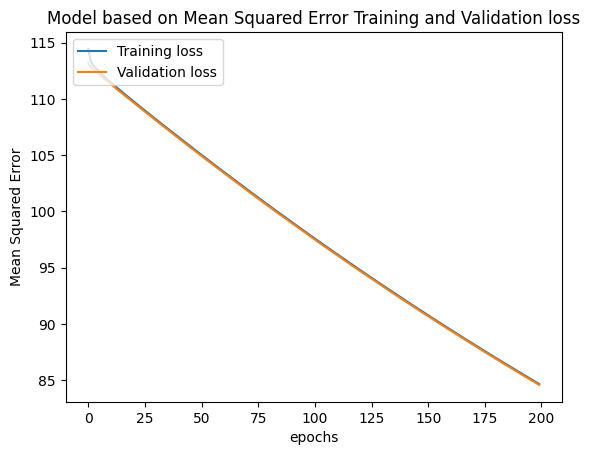

In [17]:
evaluateModel_loss(history_mse,'Model based on Mean Squared Error','loss','val_loss')

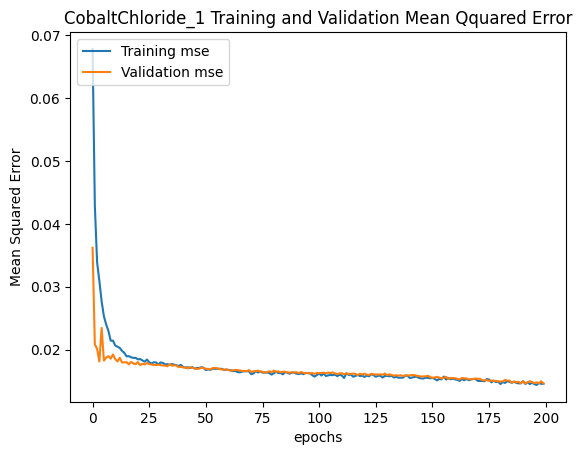

In [18]:
evaluateModel_metric(history_mse,'CobaltChloride_1','CobaltChloride_1_mse','val_CobaltChloride_1_mse')

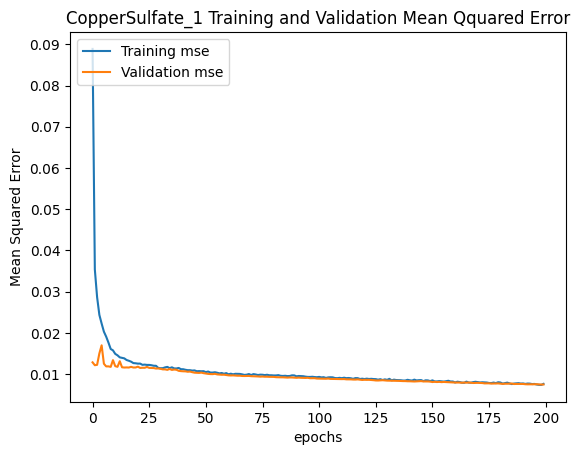

In [19]:
evaluateModel_metric(history_mse,'CopperSulfate_1','CopperSulfate_1_mse','val_CopperSulfate_1_mse')

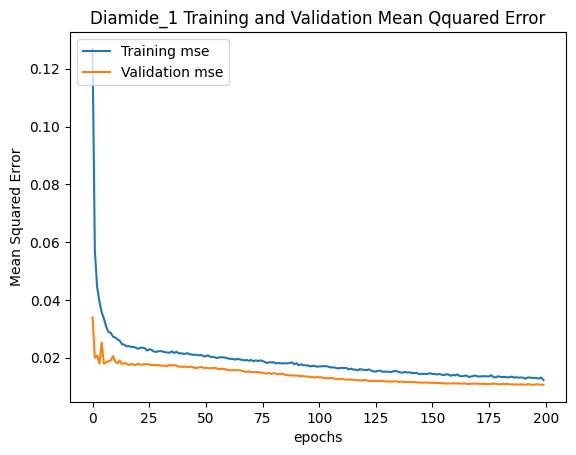

In [20]:
evaluateModel_metric(history_mse,'Diamide_1','Diamide_1_mse','val_Diamide_1_mse')

In [21]:
#saving the model
model_mse.save('saved Models/best_model_1_mse_2.h5')

In [22]:
#load saved model
model_mse = tf.keras.models.load_model('saved Models/best_model_1_mse_2.h5')

/home/rkannan/miniconda3/envs/richard_tf/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm.auto import tqdm
import itertools

predicted_labels = np.array(model_mse.predict(np.stack(x_test.reshape((x_test.shape[0], 28220,3))))).T
print(predicted_labels.shape)
print(predicted_labels[0,:,:])
df = pd.DataFrame(predicted_labels[0,:,0:3],columns=['CobaltChloride_1_pred','CopperSulfate_1_pred','Diamide_1_pred'])
df['CobaltChloride_1_actual'] = y_test[:,0]
df['CopperSulfate_1_actual'] = y_test[:,1]
df['Diamide_1_actual'] = y_test[:,2]
df

11/11 [==============================] - 1s 13ms/step
(1, 342, 20)
[[0.42507982 0.7531065  0.6496263  ... 0.49107653 0.4679989  0.32135916]
 [0.37696326 0.59794545 0.5067577  ... 0.58020204 0.4979183  0.2723838 ]
 [0.3656478  0.6028707  0.7313404  ... 0.46165714 0.4344742  0.48690408]
 ...
 [0.3803517  0.73938566 0.6174213  ... 0.5707253  0.49561414 0.27268785]
 [0.46014547 0.7525703  0.5920323  ... 0.5229984  0.4300323  0.4477842 ]
 [0.35313714 0.53477556 0.56489956 ... 0.504705   0.4433323  0.40726158]]


,CobaltChloride_1_pred,CopperSulfate_1_pred,Diamide_1_pred,CobaltChloride_1_actual,CopperSulfate_1_actual,Diamide_1_actual
0,0.425080,0.753106,0.649626,0.386278,0.785854,0.710069
1,0.376963,0.597945,0.506758,0.532230,0.425676,0.592151
2,0.365648,0.602871,0.731340,0.343185,0.679785,0.734903
3,0.396159,0.751543,0.743472,0.321659,0.770034,0.739904
4,0.379078,0.711256,0.475215,0.341883,0.766846,0.465776
...,...,...,...,...,...,...
337,0.390769,0.626714,0.641623,0.373148,0.553857,0.650016
338,0.377846,0.654230,0.579196,0.353811,0.866678,0.579248
339,0.380352,0.739386,0.617421,0.355595,0.745585,0.678076
340,0.460145,0.752570,0.592032,0.687141,0.729696,0.586857


<Axes: title={'center': 'Diamide_1_pred Vs Diamide_1_actual'}, xlabel='phenotype index', ylabel='trait value'>

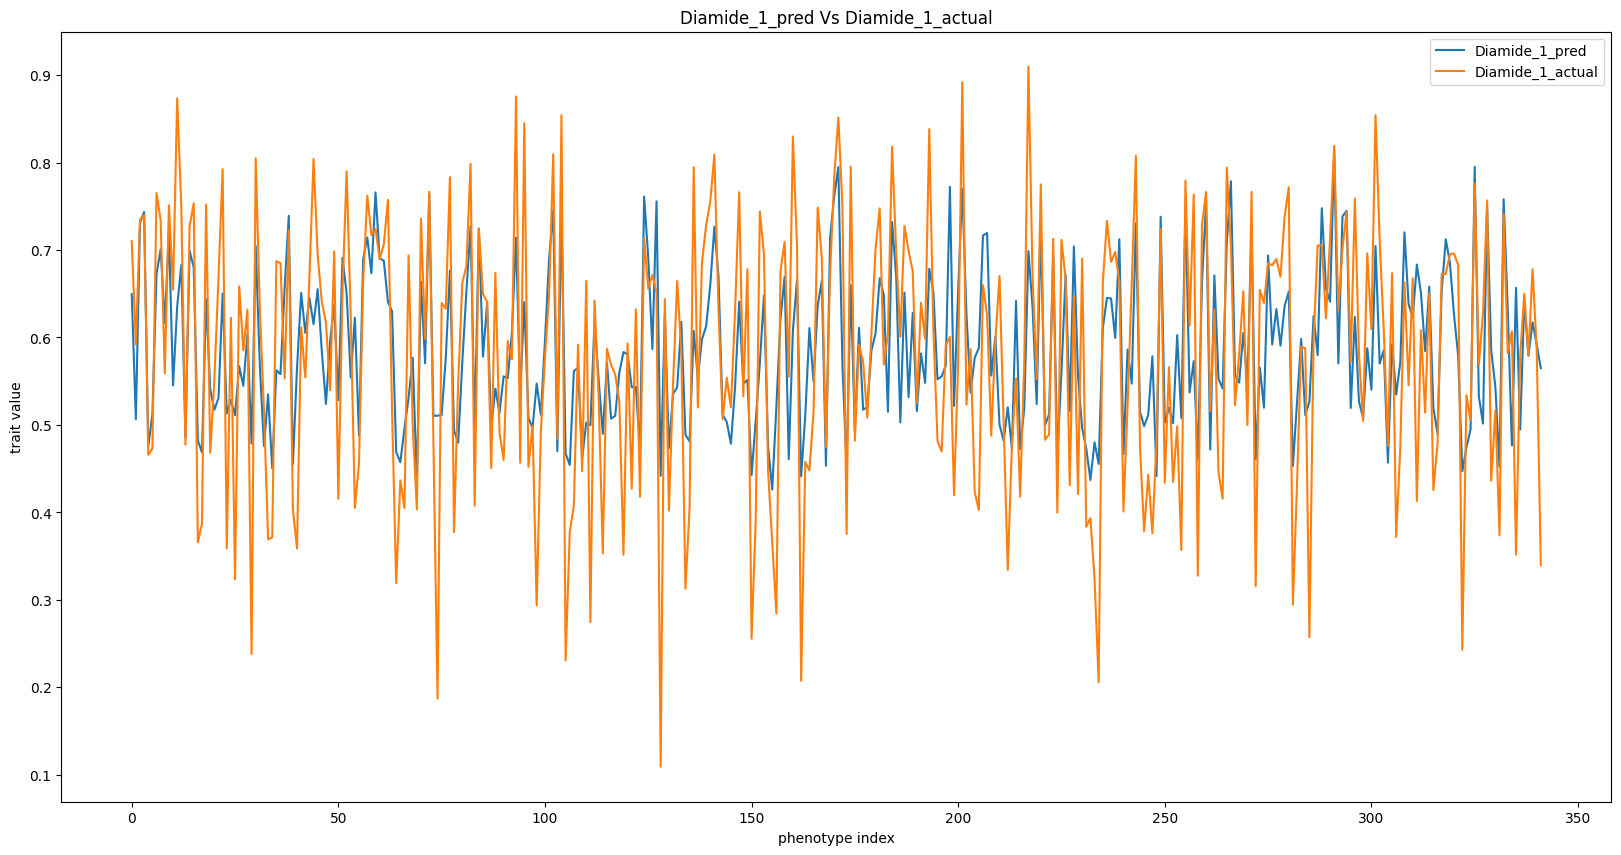

In [24]:
pred1=df[['Diamide_1_pred','Diamide_1_actual']]
pred1.plot.line(figsize=(20,10),title='Diamide_1_pred Vs Diamide_1_actual',xlabel='phenotype index',ylabel='trait value')

<Axes: title={'center': 'CobaltChloride_1_predicted Vs CobaltChloride_1_actual'}, xlabel='phenotype index', ylabel='trait value'>

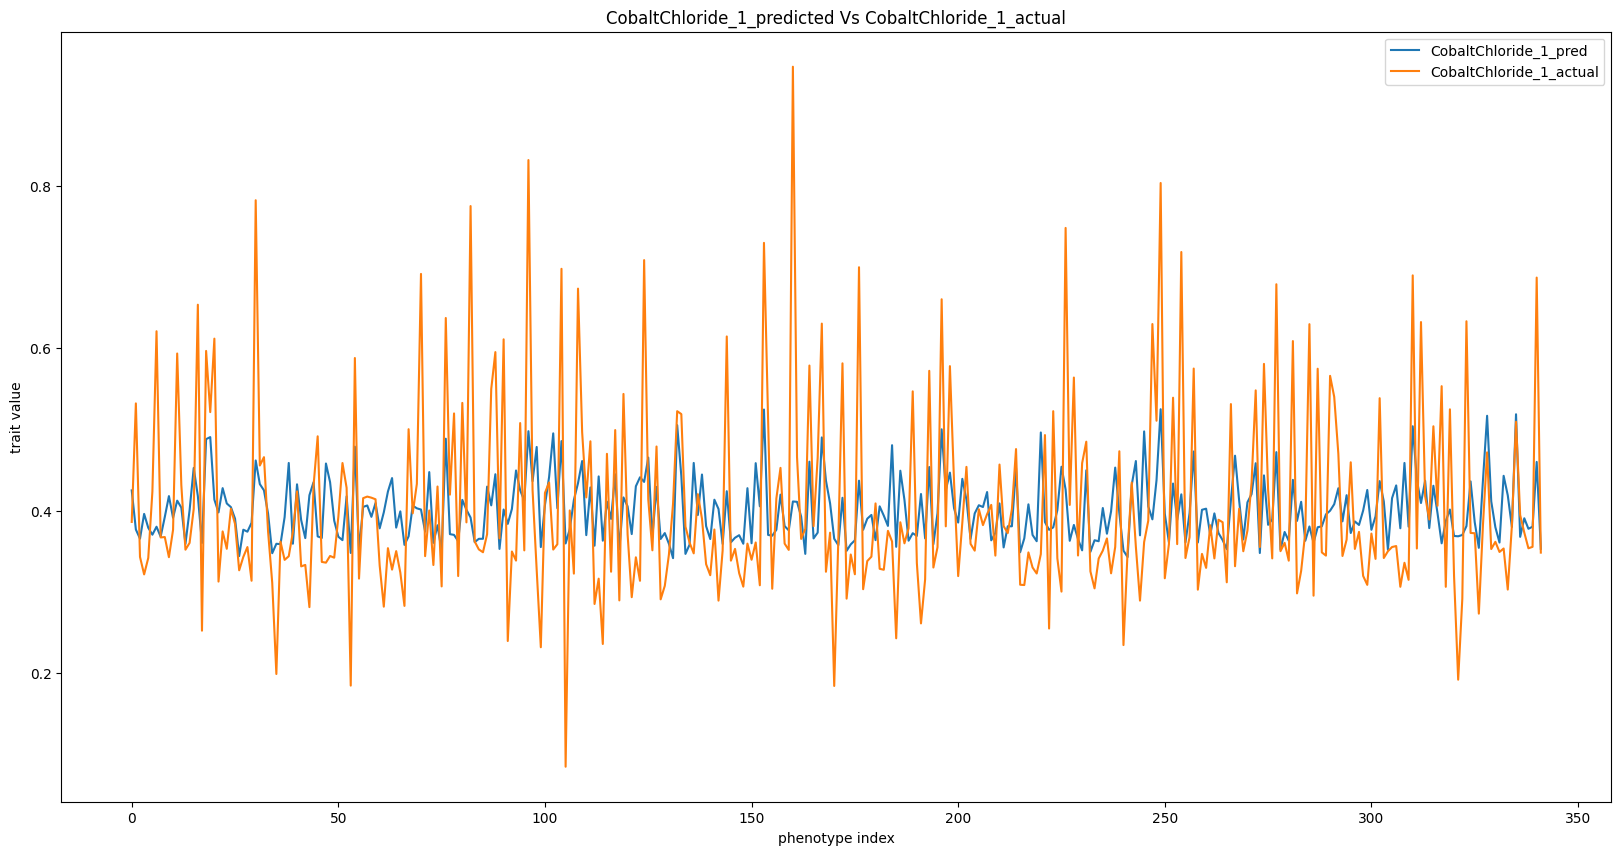

In [25]:
pred1=df[['CobaltChloride_1_pred','CobaltChloride_1_actual']]
pred1.plot.line(figsize=(20,10),title='CobaltChloride_1_predicted Vs CobaltChloride_1_actual',xlabel='phenotype index',ylabel='trait value')

<Axes: title={'center': 'CopperSulfate_1_pred vs CopperSulfate_1_actual'}, xlabel='phenotype index', ylabel='trait value'>

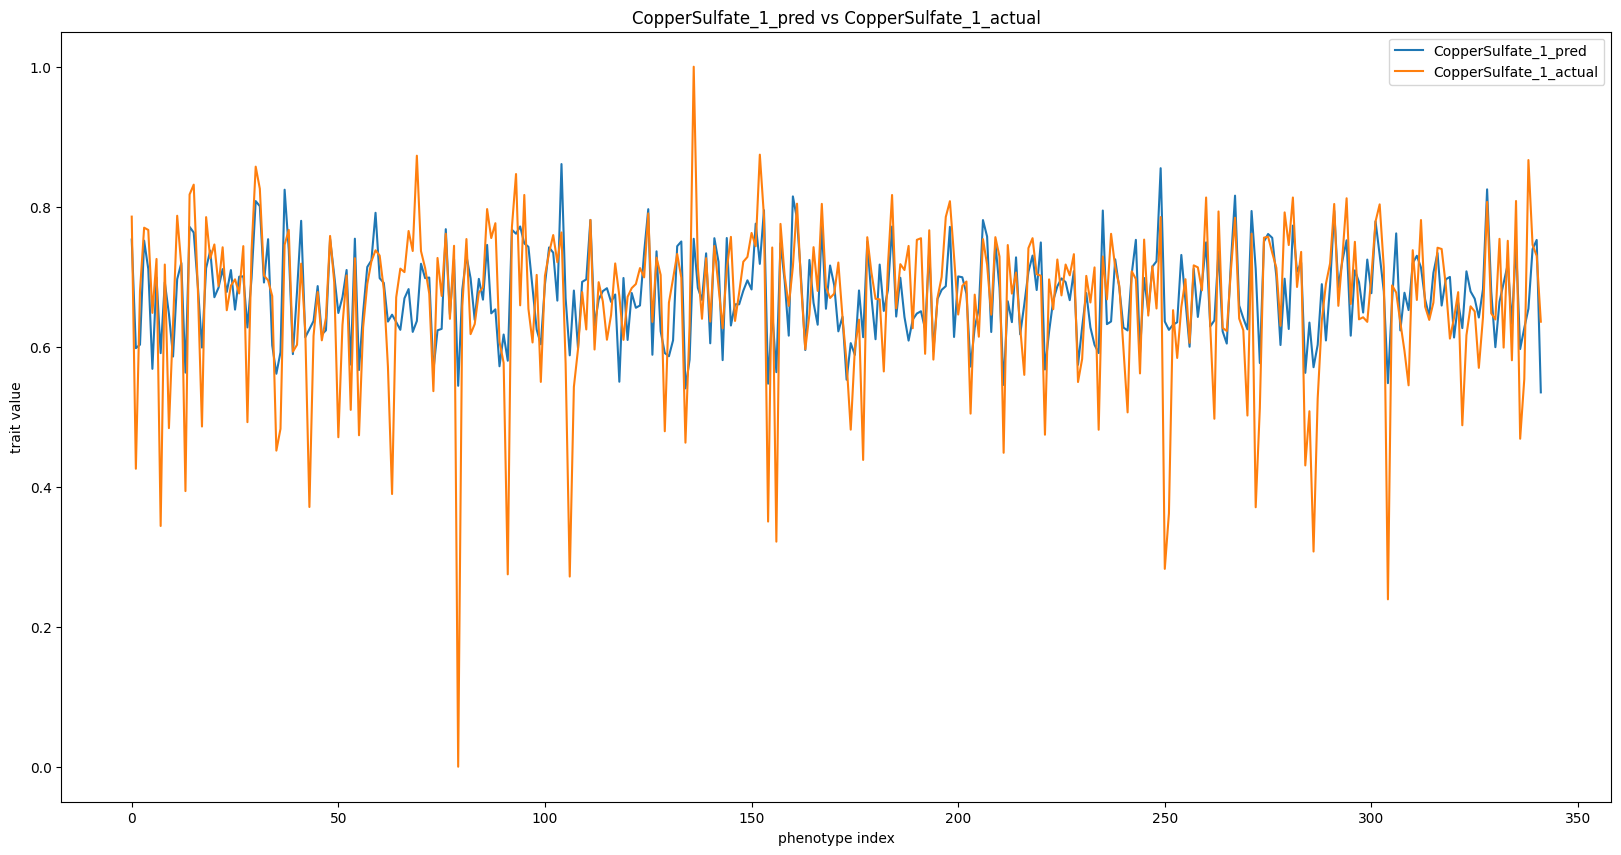

In [26]:
pred2=df[['CopperSulfate_1_pred','CopperSulfate_1_actual']]
pred2.plot.line(figsize=(20,10), title = 'CopperSulfate_1_pred vs CopperSulfate_1_actual',xlabel='phenotype index',ylabel='trait value')

In [28]:
evaluate_data = model_mse.evaluate(
    x_test, y_test, verbose=1, batch_size=32)
#print(evaluate_data)

# predict
predict_data = model_mse.predict(x_test)

11/11 [==============================] - 0s 11ms/step
